# Booking

## Part B

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import seaborn as sns


# Load the dataset
data = pd.read_csv('/content/nyc_hotels_dataProject.csv')
data["rating_description"] = data["rating"].str.extract(r'(?i)\d+\.\d+\n\d+\.\d+\n(.*?)\n')
description_mapping = {
    "Wonderful": 4,
    "Excellent": 3,
    "Very Good": 2,
    "Good": 1,
    "Review score": 0
}

#Data cleaning- unnecessary words and symbols
data["rating_numeric"] = data["rating_description"].map(description_mapping).astype(float)
data["price"] = data["price"].str.replace("$", "", regex=False).str.replace(",", "", regex=False).astype(float)
data["review_count"] = data["review_count"].str.extract(r'(\d+)').astype(float).astype(int)
data["stars"] = data["stars"].str.replace("stars", "", regex=False).astype(int)
data["distance"] = data["distance"].str.extract(r'(\d+\.?\d*)').astype(float)
data["distance"] = data["distance"].replace( np.nan, data["distance"].median())

data["check_in"] = data["check_in"].str.strip().str.replace(r'[^0-9/-]', '', regex=True)
data["check_out"] = data["check_out"].str.strip().str.replace(r'[^0-9/-]', '', regex=True)
data["snapshot_date"] = data["snapshot_date"].str.strip().str.replace(r'[^0-9/-]', '', regex=True)

data["snapshot_date"] = pd.to_datetime(data["snapshot_date"], format="%Y-%m-%d", errors="coerce")
data["check_in"] = pd.to_datetime(data["check_in"], format="%Y-%m-%d", errors="coerce")
data["check_out"] = pd.to_datetime(data["check_out"], format="%Y-%m-%d", errors="coerce")

fields = ["room_type", "rating_description"]
unique_values = {field: data[field].unique().tolist() for field in fields}
for field, values in unique_values.items():
    print(f"Unique values for {field}:")
    print(values)
    print("-" * 50)

data['address_numeric'] = pd.factorize(data['address'])[0]
data['room_type_numeric'] = pd.factorize(data['room_type'])[0]

data.drop(columns=["rating"], inplace=True)
data.drop(columns=["review_count"], inplace=True)

data.head(20)


Unique values for room_type:
['Deluxe King Room', 'Standard King Room', 'Double Room with Two Double Beds - Non-Smoking', 'Classic King Room', 'Studio Queen', 'Deluxe Double Room', 'Social City View Doubles', 'Double Bed room', 'Guest room, 1 Queen', 'Park Lane King', 'King Studio', 'Deluxe King', 'Guest room, 2 Queen, Corner room', 'King Room', 'Double Room - Non-Smoking', 'Queen Studio', "Three's Company", 'Superior Queen Room', 'Premium Double or Twin Room', 'Soho King Room', 'King Premier Corner Room, Non-Smoking', 'Essential King Room', 'Standard King Room with Mobility Accessible Roll-In Shower', 'Queen Room with Two Queen Beds', 'Guest room, 2 Double, City view', 'RENOVATED Premier King - Hudson River View - High Floor', 'Guest room, 2 Double', 'Deluxe King Room with City View', '1 Queen Bed, Studio Apartment, Non-Smoking', 'Queen Room with Two Queen Beds and Sofa Bed', 'Standard Full', 'King Room with City View and Mobility/Hearing Access Tub', 'Essential Queen Room', 'King Roo

,name,price,address,distance,numeric_review_count,numeric_score,stars,room_type,snapshot_date,check_in,check_out,ttt,los,rating_description,rating_numeric,address_numeric,room_type_numeric
0,Canal Loft Hotel,130.0,"Chinatown, New York",3.7,1735,6.9,2,Deluxe King Room,2025-03-11,2025-03-12,2025-03-13,1,1,Review score,0.0,0,0
1,"The Cloud One New York-Downtown, by the Motel ...",229.0,"Manhattan, New York",4.4,6533,8.6,4,Standard King Room,2025-03-11,2025-03-12,2025-03-13,1,1,Excellent,3.0,1,1
2,AC Hotel by Marriott New York Downtown,239.0,"Manhattan, New York",4.5,1608,8.4,4,Double Room with Two Double Beds - Non-Smoking,2025-03-11,2025-03-12,2025-03-13,1,1,Very Good,2.0,1,2
3,Park Central,219.0,"Manhattan, New York",1.9,7527,7.3,3,Classic King Room,2025-03-11,2025-03-12,2025-03-13,1,1,Good,1.0,1,3
4,UNTITLED at 3 Freeman Alley,263.0,"Lower East Side, New York",3.2,594,8.5,4,Studio Queen,2025-03-11,2025-03-12,2025-03-13,1,1,Very Good,2.0,2,4
5,Hotel Indigo NYC Financial District by IHG,209.0,"Manhattan, New York",4.5,1609,8.9,4,Standard King Room,2025-03-11,2025-03-12,2025-03-13,1,1,Excellent,3.0,1,1
6,Aura Hotel Times Square Newly Renovated,238.0,"Manhattan, New York",1.9,507,7.7,3,Deluxe Double Room,2025-03-11,2025-03-12,2025-03-13,1,1,Good,1.0,1,5
7,M Social Hotel Times Square New York,289.0,"Manhattan, New York",1.9,11958,8.4,4,Social City View Doubles,2025-03-11,2025-03-12,2025-03-13,1,1,Very Good,2.0,1,6
8,City Club Hotel,221.0,"Manhattan, New York",1.9,2552,7.3,3,Double Bed room,2025-03-11,2025-03-12,2025-03-13,1,1,Good,1.0,1,7
9,Moxy NYC East Village,329.0,"East Village, New York",2.6,1822,8.3,4,"Guest room, 1 Queen",2025-03-11,2025-03-12,2025-03-13,1,1,Very Good,2.0,3,8


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  45000 non-null  object        
 1   price                 45000 non-null  float64       
 2   address               45000 non-null  object        
 3   distance              45000 non-null  float64       
 4   numeric_review_count  45000 non-null  int64         
 5   numeric_score         45000 non-null  float64       
 6   stars                 45000 non-null  int64         
 7   room_type             45000 non-null  object        
 8   snapshot_date         45000 non-null  datetime64[ns]
 9   check_in              45000 non-null  datetime64[ns]
 10  check_out             45000 non-null  datetime64[ns]
 11  ttt                   45000 non-null  int64         
 12  los                   45000 non-null  int64         
 13  rating_descripti

In [114]:
import pandas as pd

Q1 = data['price'].quantile(0.25)  # (25%)
Q3 = data['price'].quantile(0.75)  # (75%)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]
data.to_csv('/content/nyc_hotels_dataProject_filtered.csv', index=False)
print("Saved: /content/nyc_hotels_dataProject_filtered.csv")

Saved: /content/nyc_hotels_dataProject_filtered.csv


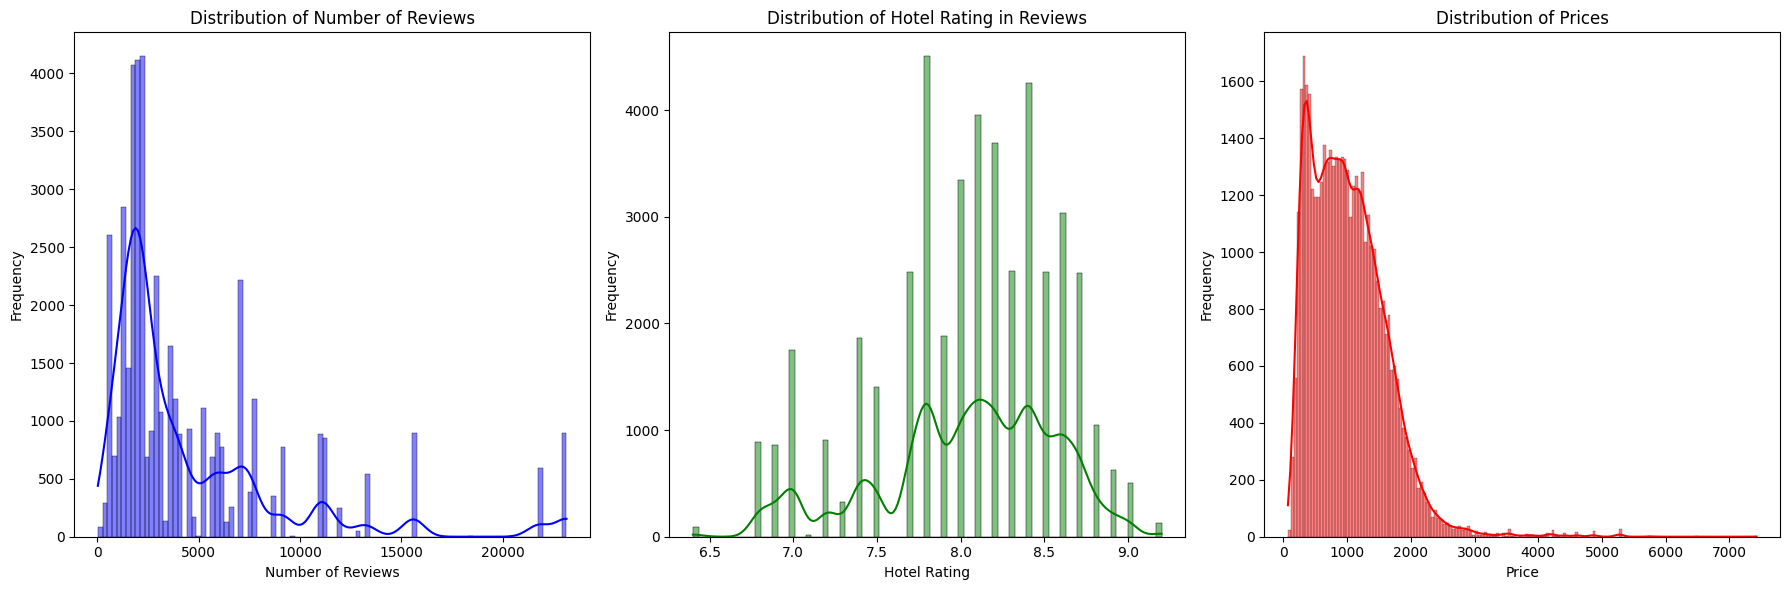

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(18, 6))  # Adjusted for a wider layout

# 1. Distribution of the number of reviews
plt.subplot(1, 3, 1)  # One row, three columns, first subplot
sns.histplot(data['numeric_review_count'].dropna(), kde=True, color='blue')
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')

# 2. Distribution of hotel rating in reviews
plt.subplot(1, 3, 2)  # One row, three columns, second subplot
sns.histplot(data['numeric_score'].dropna(), kde=True, color='green')
plt.title('Distribution of Hotel Rating in Reviews')
plt.xlabel('Hotel Rating')
plt.ylabel('Frequency')

# 3. Distribution of prices
plt.subplot(1, 3, 3)  # One row, three columns, third subplot
sns.histplot(data['price'].dropna(), kde=True, color='red')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

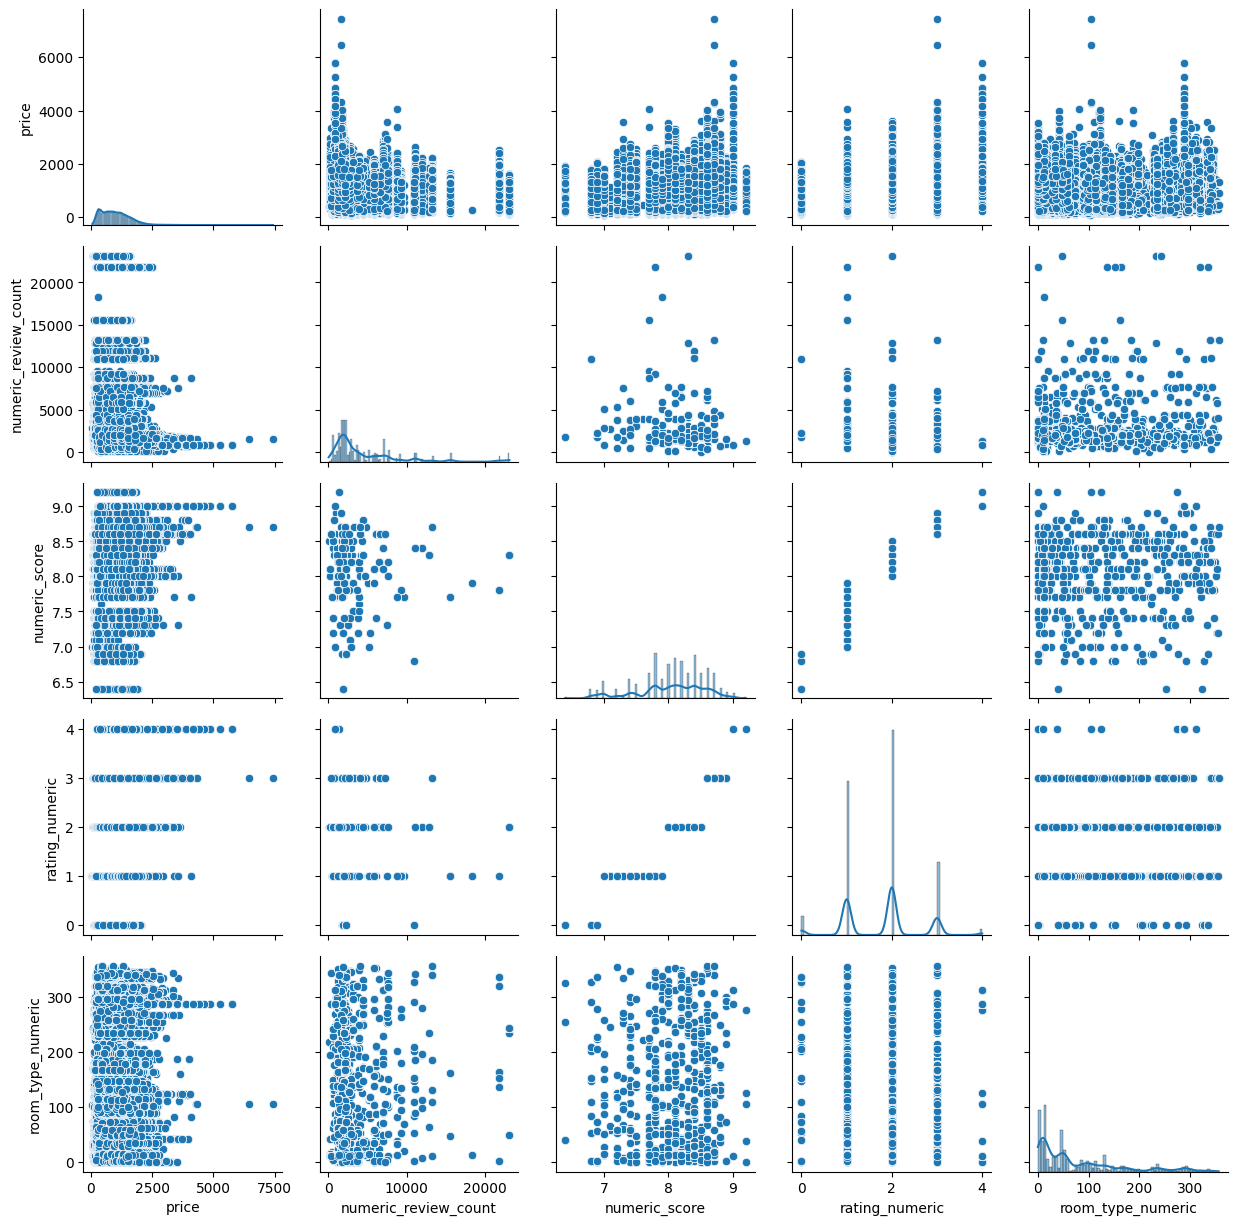

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numeric columns for visualization
selected_columns = ["price", "numeric_review_count", "numeric_score", "rating_numeric", "room_type_numeric"]

# Create a PairGrid for visualizing relationships
g = sns.PairGrid(data[selected_columns])
g.map_diag(sns.histplot, kde=True)
g.map_offdiag(sns.scatterplot)


In [117]:

data["checkin_day_of_week"] = data["check_in"].dt.weekday
data["is_weekend_checkin"] = data["checkin_day_of_week"].apply(lambda x: 1 if x >= 4 else 0)

data["price_per_night"] = data["price"] / data["los"]
data["price_per_night"].replace([np.inf, -np.inf], np.nan, inplace=True)


data["price_per_review"] = data["price"] / (data["numeric_review_count"] + 1)
data["price_per_review"].replace([np.inf, -np.inf], np.nan, inplace=True)
data.to_csv('/content/nyc_hotels_dataProject_filtered.csv', index=False)
print("Saved: /content/nyc_hotels_dataProject_filtered.csv")

<ipython-input-117-b0aac440058a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["price_per_night"].replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-117-b0aac440058a>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

Saved: /content/nyc_hotels_dataProject_filtered.csv


In [118]:
from sklearn.model_selection import train_test_split

features = [
    "numeric_review_count", "numeric_score", "rating_numeric",
    "room_type_numeric", "checkin_day_of_week", "is_weekend_checkin",
    "los", "price_per_review", "price_per_night","ttt","distance","address_numeric","stars"
]
target = "price"

X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.3, random_state=42)
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

Train set: (31500, 13), Test set: (13500, 13)


## Part C

### LinearRegression

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f"Linear Regression Performance:")
print(f"Train R²: {train_r2:.3f}")
print(f"Test R²: {test_r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")


Linear Regression Performance:
Train R²: 0.936
Test R²: 0.935
MAE: 98.465
MSE: 22684.040
RMSE: 150.612


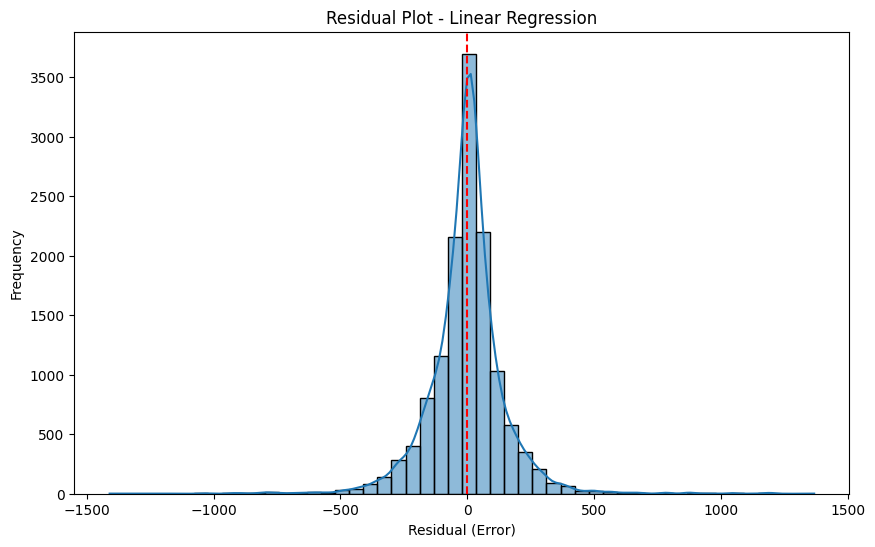

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_test_pred
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True, bins=50)
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Residual (Error)")
plt.ylabel("Frequency")
plt.title("Residual Plot - Linear Regression")
plt.show()


#### Feature Importance

**Permutation Importance is a "black box" approach**

Does not depend on the internal structure of the algorithm - the method does not refer to equations, weights or internal decisions of the model. It can be used for any model

Tests the real impact of each feature - the method examines what happens if you mix the values ​​of a particular variable and measures how this affects the predictions.

Does not require understanding how the model makes decisions - but simply tests what happens to the result if you swap the values ​​of different features.

                 Feature  Importance
6                    los    1.208738
8        price_per_night    0.514016
7       price_per_review    0.017382
1          numeric_score    0.002116
0   numeric_review_count    0.001288
2         rating_numeric    0.001201
12                 stars    0.000555
3      room_type_numeric    0.000209
5     is_weekend_checkin    0.000123
11       address_numeric    0.000046
10              distance    0.000035
9                    ttt    0.000022
4    checkin_day_of_week    0.000005


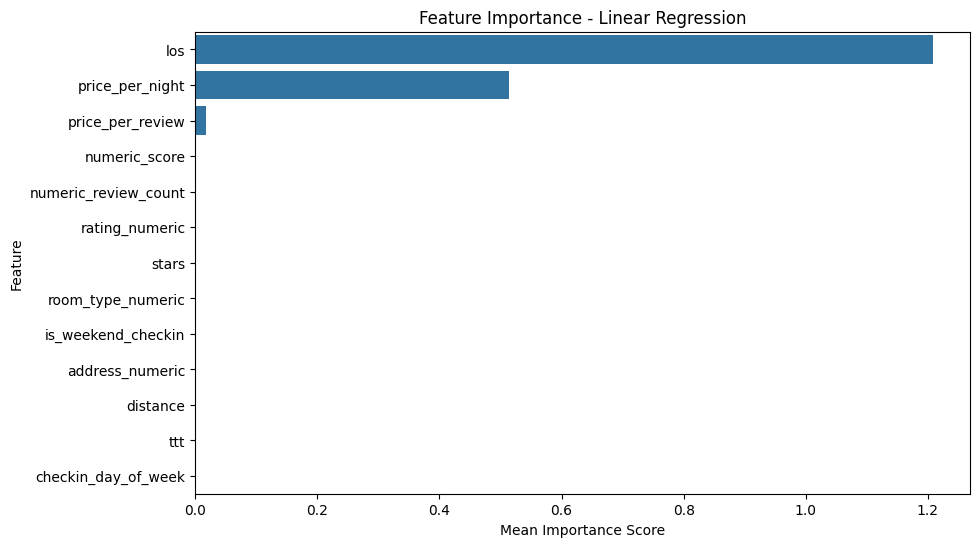

In [121]:
from sklearn.inspection import permutation_importance
import seaborn as sns

perm_importance = permutation_importance(lin_reg, X_test, y_test, n_repeats=10, random_state=42)

importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

print(importance_df)
plt.figure(figsize=(10,6))
sns.barplot(data=importance_df, x="Importance", y="Feature")
plt.title("Feature Importance - Linear Regression")
plt.xlabel("Mean Importance Score")
plt.ylabel("Feature")
plt.show()


In [122]:
print(f"Length of features: {len(features)}")
print(f"Length of lin_reg.coef_: {len(lin_reg.coef_)}")


Length of features: 13
Length of lin_reg.coef_: 13


In this method, we directly examine how the model treats each feature as part of its internal process, instead of examining what happens if we disrupt it (Permutation Importance).

In Linear Regression (LinearRegression) → We use coefficients (coef_).


Feature Importance by Regression Coefficients:
             Feature  Importance
                 los  326.234486
    price_per_review   74.358515
      rating_numeric   18.242934
               stars   17.476388
  is_weekend_checkin    9.702655
     price_per_night    2.686791
     address_numeric    0.465416
 checkin_day_of_week    0.281572
   room_type_numeric    0.105744
numeric_review_count    0.002921
                 ttt   -0.245742
            distance   -3.064387
       numeric_score  -35.729721


<ipython-input-123-2f29db00906e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_importance, x="Importance", y="Feature", palette="Blues_r")


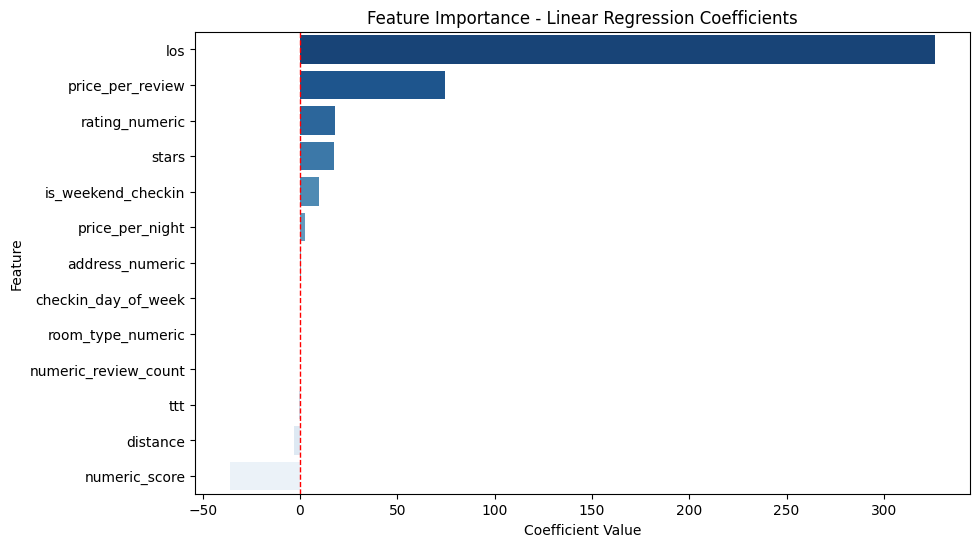

In [123]:
coef_importance = pd.DataFrame({
    "Feature": features,
    "Importance": lin_reg.coef_
}).sort_values(by="Importance", ascending=False)


print("\nFeature Importance by Regression Coefficients:")
print(coef_importance.to_string(index=False))


plt.figure(figsize=(10,6))
sns.barplot(data=coef_importance, x="Importance", y="Feature", palette="Blues_r")
plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.title("Feature Importance - Linear Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.show()

In [124]:
perm_importance = permutation_importance(lin_reg, X_test, y_test, n_repeats=10, random_state=42)

perm_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)


Splitting the data with only the influential features

In [125]:
from sklearn.model_selection import train_test_split

selected_features = ["los", "price_per_night"]
target = "price"
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    data[selected_features], data[target], test_size=0.3, random_state=42
)

print(f"Train set: {X_train_selected.shape}, Test set: {X_test_selected.shape}")


Train set: (31500, 2), Test set: (13500, 2)




Results after reducing features to ["los", "price_per_night"]

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lin_reg_selected = LinearRegression()
lin_reg_selected.fit(X_train_selected, y_train_selected)

y_train_pred_selected = lin_reg_selected.predict(X_train_selected)
y_test_pred_selected = lin_reg_selected.predict(X_test_selected)

train_r2_selected = r2_score(y_train_selected, y_train_pred_selected)
test_r2_selected = r2_score(y_test_selected, y_test_pred_selected)
mae_selected = mean_absolute_error(y_test_selected, y_test_pred_selected)
mse_selected = mean_squared_error(y_test_selected, y_test_pred_selected)
rmse_selected = np.sqrt(mse_selected)

results_selected = {
    "R² (Train)": train_r2_selected,
    "R² (Test)": test_r2_selected,
    "MAE": mae_selected,
    "MSE": mse_selected,
    "RMSE": rmse_selected
}
results_selected_df = pd.DataFrame([results_selected])
print(results_selected_df.to_string(index=False))


 R² (Train)  R² (Test)       MAE          MSE       RMSE
   0.929463   0.928877 96.209563 24766.498845 157.373755


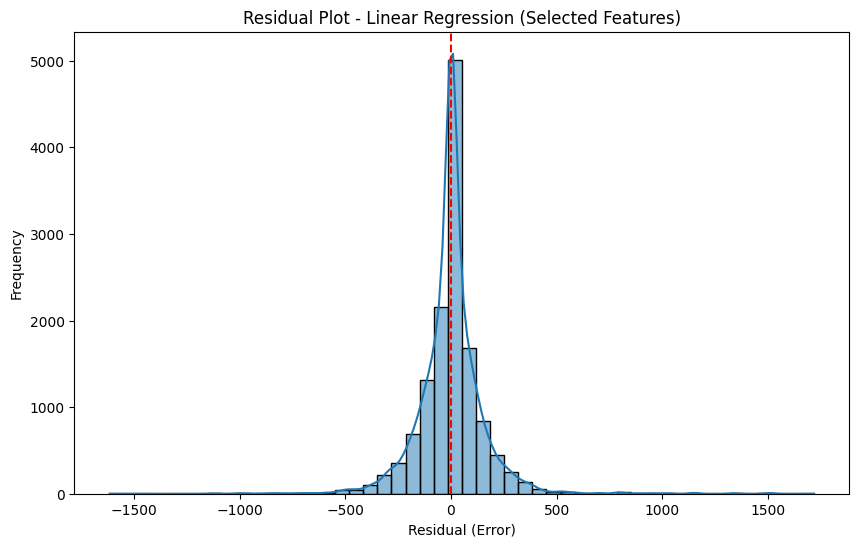

In [127]:
residuals_selected = y_test_selected - y_test_pred_selected
plt.figure(figsize=(10,6))
sns.histplot(residuals_selected, kde=True, bins=50)
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Residual (Error)")
plt.ylabel("Frequency")
plt.title("Residual Plot - Linear Regression (Selected Features)")
plt.show()

**Testing the effect of normalization -  selected_features**

In [128]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

file_path = '/content/nyc_hotels_dataProject_filtered.csv'
df = pd.read_csv(file_path)

selected_features = ["los", "price_per_night"]
target = "price"

X_train, X_test, y_train, y_test = train_test_split(df[selected_features], df[target], test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_reg_scaled = LinearRegression()
lin_reg_scaled.fit(X_train_scaled, y_train)

y_train_pred_scaled = lin_reg_scaled.predict(X_train_scaled)
y_test_pred_scaled = lin_reg_scaled.predict(X_test_scaled)

train_r2_scaled = r2_score(y_train, y_train_pred_scaled)
test_r2_scaled = r2_score(y_test, y_test_pred_scaled)
mae_scaled = mean_absolute_error(y_test, y_test_pred_scaled)
mse_scaled = mean_squared_error(y_test, y_test_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)

results_scaled_df = pd.DataFrame([{
    "R² (Train)": train_r2_scaled,
    "R² (Test)": test_r2_scaled,
    "MAE": mae_scaled,
    "MSE": mse_scaled,
    "RMSE": rmse_scaled
}])
print(results_scaled_df.to_string(index=False))


 R² (Train)  R² (Test)       MAE          MSE       RMSE
   0.929463   0.928877 96.209563 24766.498845 157.373755


**Testing the effect of normalization -  all features**

In [150]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


file_path = '/content/nyc_hotels_dataProject_filtered.csv'
df = pd.read_csv(file_path)

df["price_per_review"] = df["price"] / (df["numeric_review_count"] + 1)
df["is_weekend_checkin"] = df["check_in"].apply(lambda x: 1 if pd.to_datetime(x).weekday() >= 4 else 0)
df["checkin_day_of_week"] = df["check_in"].apply(lambda x: pd.to_datetime(x).weekday())


features = [
    "numeric_review_count", "numeric_score", "rating_numeric",
    "room_type_numeric", "checkin_day_of_week", "is_weekend_checkin",
    "los", "price_per_review", "price_per_night","ttt","distance","address_numeric","stars"
]
target = "price"

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42)

# StandardScaler
standard_scaler = StandardScaler()
X_train_standardized = standard_scaler.fit_transform(X_train)
X_test_standardized = standard_scaler.transform(X_test)

# MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

# StandardScaler
lin_reg_standard = LinearRegression()
lin_reg_standard.fit(X_train_standardized, y_train)
y_pred_standard = lin_reg_standard.predict(X_test_standardized)

# MinMaxScaler
lin_reg_minmax = LinearRegression()
lin_reg_minmax.fit(X_train_minmax, y_train)
y_pred_minmax = lin_reg_minmax.predict(X_test_minmax)

results = pd.DataFrame([
    {
        "Scaling": "None",
        "R² (Test)": r2_score(y_test, y_test_pred),
        "MAE": mean_absolute_error(y_test,y_test_pred),
        "MSE": mean_squared_error(y_test, y_test_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred))
    },
    {
        "Scaling": "StandardScaler",
        "R² (Test)": r2_score(y_test, y_pred_standard),
        "MAE": mean_absolute_error(y_test, y_pred_standard),
        "MSE": mean_squared_error(y_test, y_pred_standard),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_standard))
    },
    {
        "Scaling": "MinMaxScaler",
        "R² (Test)": r2_score(y_test, y_pred_minmax),
        "MAE": mean_absolute_error(y_test, y_pred_minmax),
        "MSE": mean_squared_error(y_test, y_pred_minmax),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_minmax))
    }
])

print(results.to_string(index=False))


       Scaling  R² (Test)       MAE          MSE       RMSE
          None   0.934857 98.465258 22684.039667 150.612216
StandardScaler   0.934857 98.465258 22684.039667 150.612216
  MinMaxScaler   0.934857 98.465258 22684.039667 150.612216


**Normalization did not improve performance**

 * Conclusion linear regression






The best model is linear regression with Feature Engineering and no normalization:

It achieved the highest R² (0.9348)

The total error (MSE) was the lowest (22,720.89)

The RMSE was the lowest (150.73)

**Conclusion:**

Adding new features improved the model!
Normalization did not help in this case, because linear regression is insensitive to the ranges of the variables.

### Decision Tree Regressor

---



Training Decision Tree with max_depth=5...


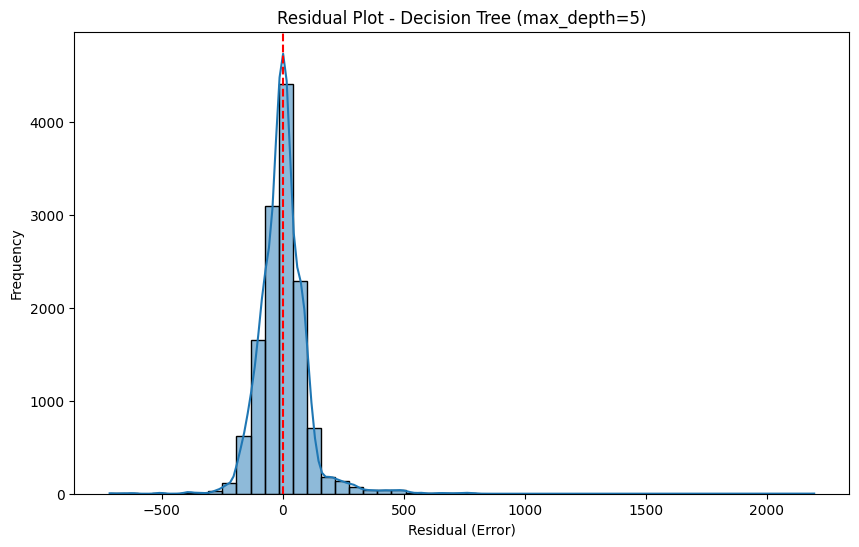

Training Decision Tree with max_depth=10...


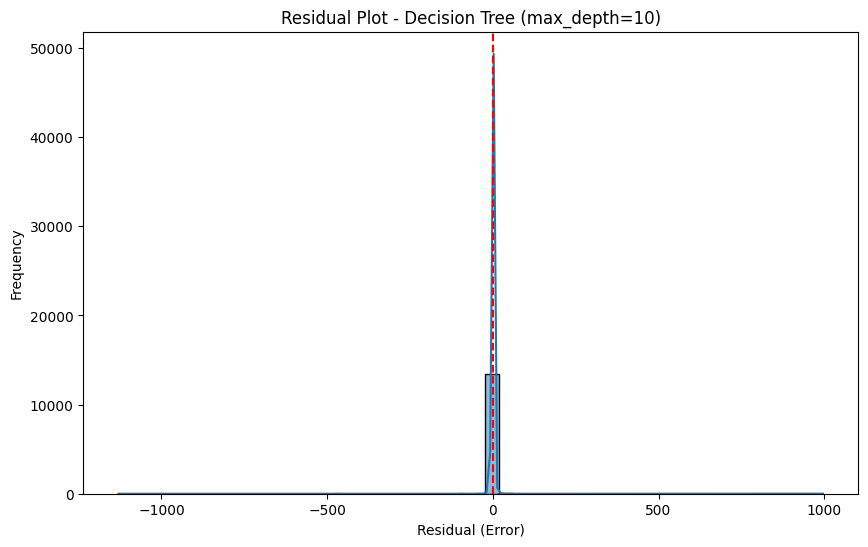

Training Decision Tree with max_depth=20...


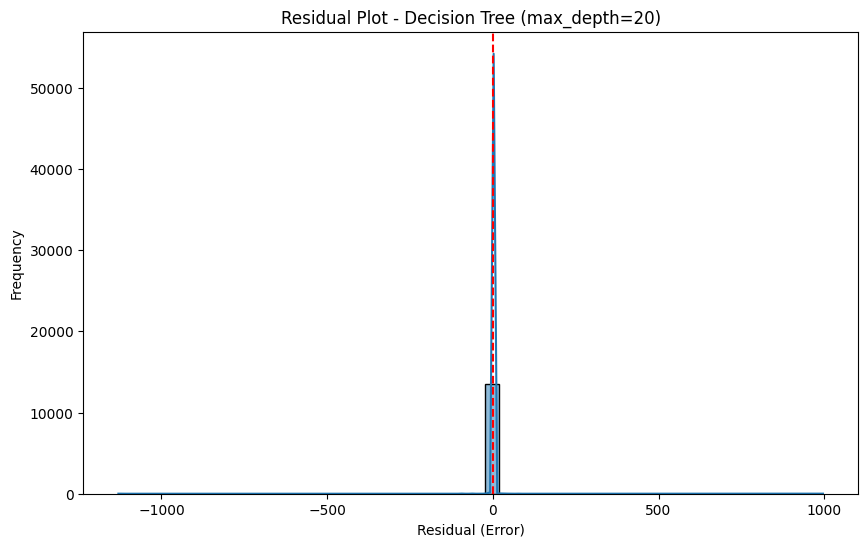


Decision Tree:
     Test R²        MAE           MSE        RMSE
5   0.969857  68.251940  10496.202511  102.450976
10  0.999348   2.551741    227.112292   15.070245
20  0.999496   0.360000    175.658222   13.253612


In [151]:
from sklearn.tree import DecisionTreeRegressor

features = [
    "numeric_review_count", "numeric_score", "rating_numeric",
    "room_type_numeric", "checkin_day_of_week", "is_weekend_checkin",
    "los", "price_per_review", "price_per_night","ttt","distance","address_numeric","stars"
]
target = "price"

def plot_residuals(y_test, y_test_pred, model_name):
    residuals = y_test - y_test_pred

    plt.figure(figsize=(10,6))
    sns.histplot(residuals, kde=True, bins=50)
    plt.axvline(0, color="red", linestyle="--")
    plt.xlabel("Residual (Error)")
    plt.ylabel("Frequency")
    plt.title(f"Residual Plot - {model_name}")
    plt.show()

tree_results = {}

for depth in [5, 10, 20]:
    print(f"Training Decision Tree with max_depth={depth}...")

    tree_reg = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree_reg.fit(X_train, y_train)
    y_test_pred_tree = tree_reg.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred_tree)
    mae = mean_absolute_error(y_test, y_test_pred_tree)
    mse = mean_squared_error(y_test, y_test_pred_tree)
    rmse = np.sqrt(mse)

    tree_results[depth] = {
        "Test R²": test_r2,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse
    }
    plot_residuals(y_test, y_test_pred_tree, f"Decision Tree (max_depth={depth})")

tree_results_df = pd.DataFrame(tree_results).T

print("\nDecision Tree:")
print(tree_results_df.to_string(index=True))


max_depth = 5  :


Relative errors are scattered, but most values ​​are centered around 0.
The error distribution appears to be normal, with long tails (outliers).
May not capture complex relationships, but still provides a stable model.

max_depth = 10   :

The errors are smaller than the previous model, meaning the prediction is more accurate.
The distribution is much sharper, with few outliers.
Possible Overfitting – we will check the R² of the test versus the training.

max_depth = 20 :


Most of the errors are very close to 0 – a sign that the model fits the training data very well.
But the error distribution is almost invisible, indicating severe overfitting.
The model overfits the training data, and therefore may fail to predict test data.

Decision Trees are not sensitive to data scales, so we will not experiment with normalization.

#### Feature Importance

In [152]:
print(f"Number of features: {len(features)}")
print(f"Number of importances: {len(tree_reg.feature_importances_)}")


Number of features: 13
Number of importances: 13



Feature Importance `DecisionTreeRegressor` (`feature_importances_`):
             Feature   Importance
                 los 6.380776e-01
     price_per_night 3.546717e-01
    price_per_review 5.412423e-03
numeric_review_count 1.006824e-03
     address_numeric 6.048756e-04
       numeric_score 2.174923e-04
   room_type_numeric 5.956510e-06
 checkin_day_of_week 1.682839e-06
                 ttt 8.167787e-07
      rating_numeric 2.689571e-07
            distance 2.283087e-07
  is_weekend_checkin 6.990801e-08
               stars 2.408630e-08


<ipython-input-154-6532a254ba9e>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tree_feature_importance, x="Importance", y="Feature", palette="Blues_r")


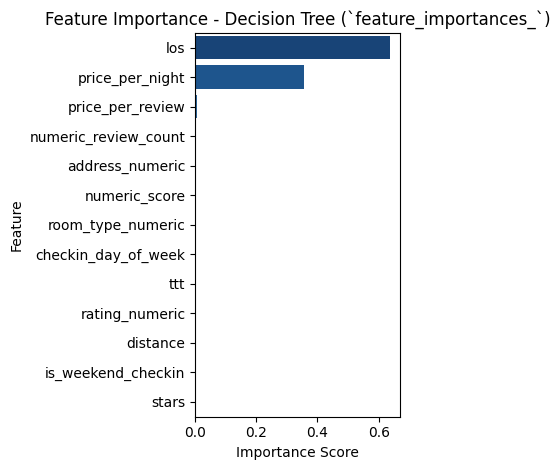

In [154]:
features = [
    "numeric_review_count", "numeric_score", "rating_numeric",
    "room_type_numeric", "checkin_day_of_week", "is_weekend_checkin",
    "los", "price_per_review", "price_per_night","ttt","distance","address_numeric","stars"
]
target = "price"

tree_feature_importance = pd.DataFrame({
    "Feature": features,
    "Importance": tree_reg.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance `DecisionTreeRegressor` (`feature_importances_`):")
print(tree_feature_importance.to_string(index=False))

# Feature Importances graph by Decision Tree
plt.subplot(1,2,1)
sns.barplot(data=tree_feature_importance, x="Importance", y="Feature", palette="Blues_r")
plt.title("Feature Importance - Decision Tree (`feature_importances_`)")
plt.xlabel("Importance Score")

plt.tight_layout()
plt.show()




Feature Importance  `Permutation Importance`:
             Feature    Importance
                 los  1.454118e+00
     price_per_night  8.440360e-01
    price_per_review  5.765843e-02
numeric_review_count  2.245654e-02
     address_numeric  5.014544e-03
       numeric_score  1.368863e-04
 checkin_day_of_week  3.627507e-05
   room_type_numeric  3.207028e-06
                 ttt  1.355299e-06
      rating_numeric  7.852658e-07
  is_weekend_checkin  2.440142e-07
               stars  8.721630e-08
            distance -3.407817e-08


<ipython-input-155-dad71fe407e8>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=perm_importance_df, x="Importance", y="Feature", palette="Oranges_r")


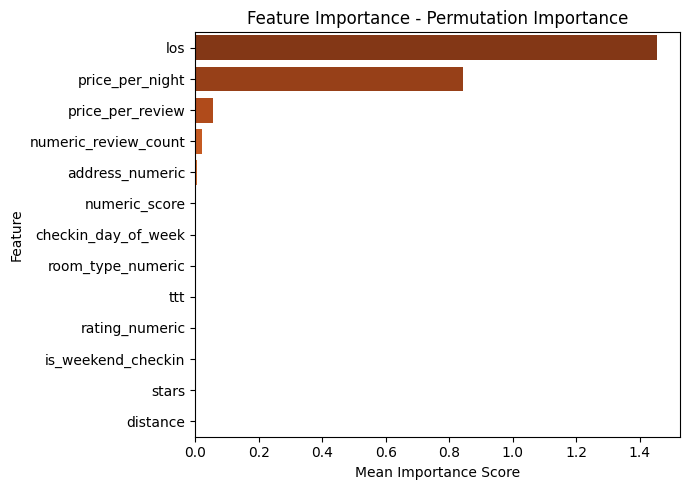

In [155]:
features = [
    "numeric_review_count", "numeric_score", "rating_numeric",
    "room_type_numeric", "checkin_day_of_week", "is_weekend_checkin",
    "los", "price_per_review", "price_per_night","ttt","distance","address_numeric","stars"
]
target = "price"
perm_importance = permutation_importance(tree_reg, X_test, y_test, n_repeats=10, random_state=42)

perm_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance  `Permutation Importance`:")
print(perm_importance_df.to_string(index=False))

plt.figure(figsize=(12,5))

# Permutation Importance Graph
plt.subplot(1,2,2)
sns.barplot(data=perm_importance_df, x="Importance", y="Feature", palette="Oranges_r")
plt.title("Feature Importance - Permutation Importance")
plt.xlabel("Mean Importance Score")

plt.tight_layout()
plt.show()

### Gaussian Process Regressor

---



Training GaussianProcessRegressor with kernel: RBF


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Kernel: RBF, R²: -1.324, MAE: 673.816, MSE: 737508.758, RMSE: 858.783

Training GaussianProcessRegressor with kernel: Matern


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Kernel: Matern, R²: -0.739, MAE: 562.814, MSE: 552045.272, RMSE: 742.997

Training GaussianProcessRegressor with kernel: RationalQuadratic


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Kernel: RationalQuadratic, R²: 0.258, MAE: 388.308, MSE: 235585.947, RMSE: 485.372

Gaussian Process Regression Results:
                         R²         MAE            MSE        RMSE
RBF               -1.323712  673.816259  737508.758305  858.783301
Matern            -0.739361  562.813696  552045.271549  742.997491
RationalQuadratic  0.257726  388.307856  235585.946683  485.371967


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


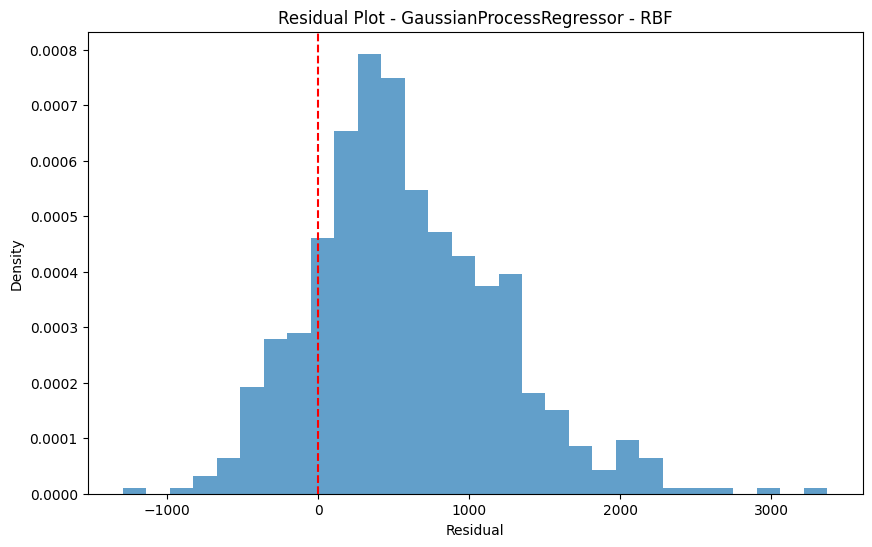

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


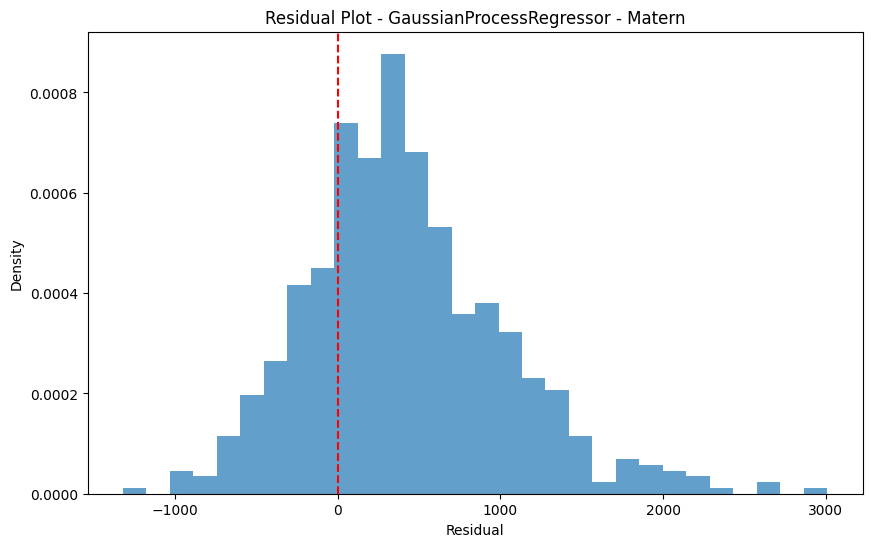

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


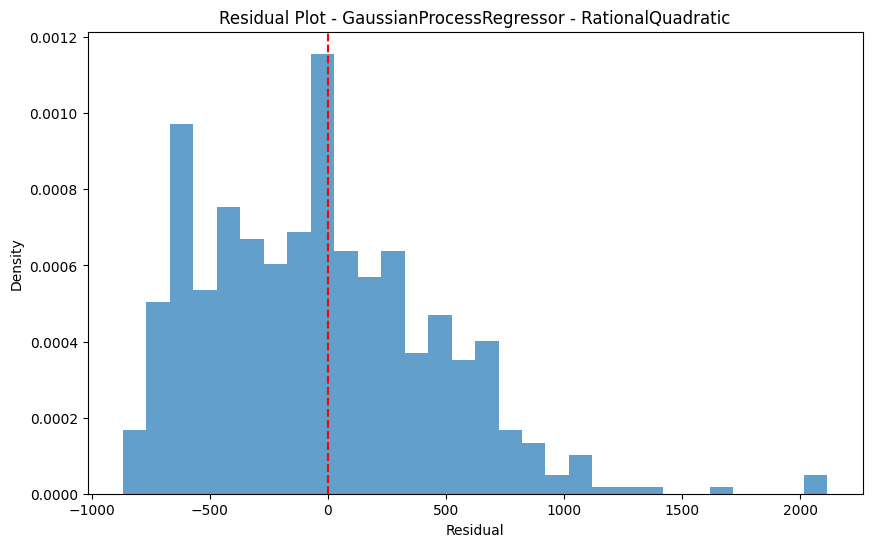

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, WhiteKernel, ConstantKernel as C
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

file_path = '/content/nyc_hotels_dataProject_filtered.csv'
df = pd.read_csv(file_path)

features = [
    "numeric_review_count", "numeric_score", "rating_numeric",
    "room_type_numeric", "checkin_day_of_week", "is_weekend_checkin",
    "los", "price_per_review", "price_per_night","ttt","distance","address_numeric","stars"
]
target = "price"

X = df[features]
y = df[target]

# Overload prevention – sampling (if the amount of data is too large)
# In case there are more than 2000 samples, we select only 2000 samples
if len(X) > 2000:
    X, _, y, _ = train_test_split(X, y, train_size=2000, random_state=42)

# Train/Test (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


kernels = {
    "RBF": C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)),
    "Matern": C(1.0, (1e-3, 1e3)) * Matern(length_scale=1.0, nu=1.5),
    "RationalQuadratic": C(1.0, (1e-3, 1e3)) * RationalQuadratic(alpha=1.0, length_scale=1.0)
}

# GaussianProcessRegressor
results = {}

for kernel_name, kernel in kernels.items():
    print(f"Training GaussianProcessRegressor with kernel: {kernel_name}")

    gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5, random_state=42, alpha=1e-2)
    gpr.fit(X_train, y_train)
    y_pred = gpr.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results[kernel_name] = {"R²": r2, "MAE": mae, "MSE": mse, "RMSE": rmse}
    print(f"Kernel: {kernel_name}, R²: {r2:.3f}, MAE: {mae:.3f}, MSE: {mse:.3f}, RMSE: {rmse:.3f}\n")


results_df = pd.DataFrame(results).T
print("Gaussian Process Regression Results:")
print(results_df.to_string())

# Residual Plot
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(10,6))
    plt.hist(residuals, bins=30, density=True, alpha=0.7)
    plt.axvline(0, color='red', linestyle='--')
    plt.title(f"Residual Plot - {model_name}")
    plt.xlabel("Residual")
    plt.ylabel("Density")
    plt.show()


for kernel_name, kernel in kernels.items():
    gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5, random_state=42, alpha=1e-2)
    gpr.fit(X_train, y_train)
    y_pred = gpr.predict(X_test)
    plot_residuals(y_test, y_pred, f"GaussianProcessRegressor - {kernel_name}")


RationalQuadratic is the kernel with the best performance among the three, with the lowest values of MAE, MSE, and RMSE, as well as a positive R² (although not high).
Matern shows better performance than RBF, but it still doesn't deliver excellent results.
RBF has the worst performance, with negative R² values and relatively large errors.

In summary, the RationalQuadratic kernel provides the best fit for the data and is therefore the most recommended in this test.

Results for No Normalization:
R²: 0.257, MAE: 388.451, MSE: 235658.530, RMSE: 485.447

Results for StandardScaler:
R²: 0.995, MAE: 17.091, MSE: 1647.521, RMSE: 40.590

Results for MinMaxScaler:
R²: 0.910, MAE: 103.035, MSE: 28457.921, RMSE: 168.695

           Model       R²        MAE           MSE       RMSE
No Normalization 0.257497 388.451218 235658.530349 485.446733
  StandardScaler 0.994809  17.091331   1647.521064  40.589667
    MinMaxScaler 0.910336 103.034849  28457.920536 168.694756


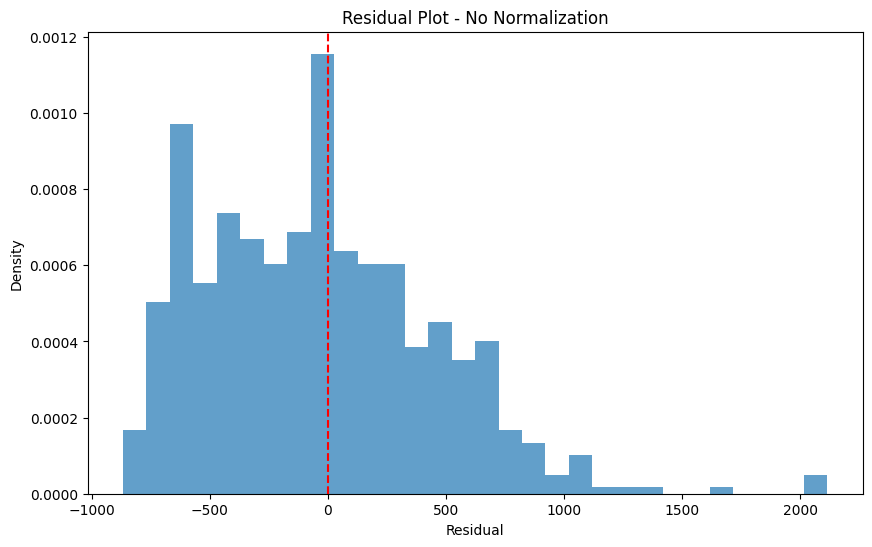

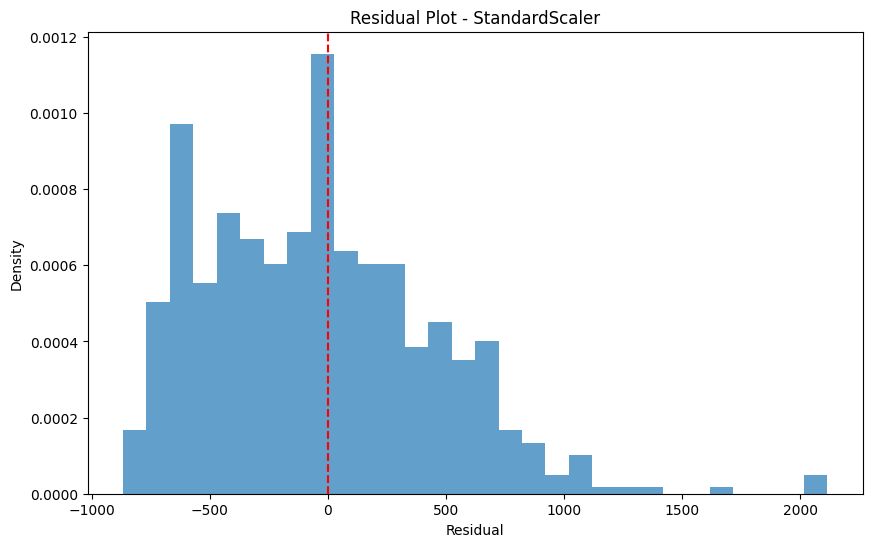

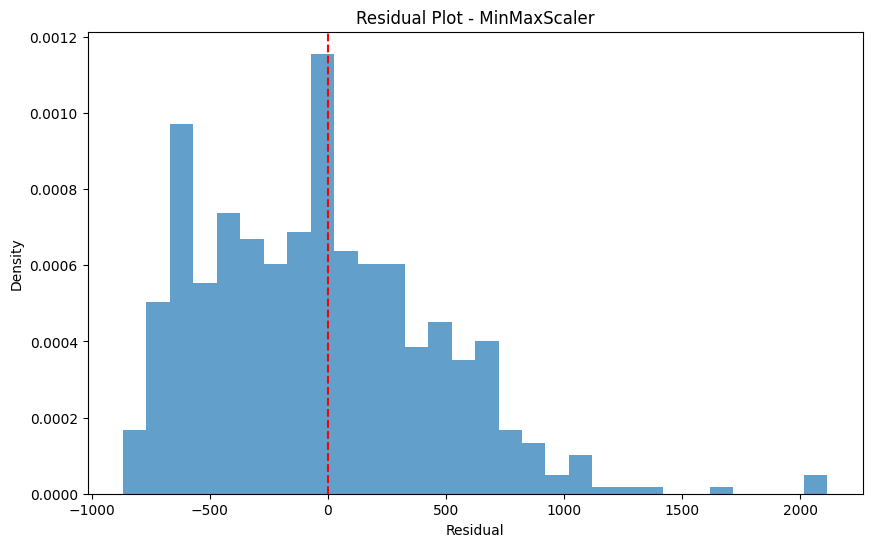

In [132]:
standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

#  RationalQuadratic
kernel = RationalQuadratic(alpha=1.0, length_scale=1.0)

def train_gpr(X_train, X_test, y_train, y_test, kernel, model_name):
    gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5, random_state=42, alpha=1e-2)
    gpr.fit(X_train, y_train)
    y_pred = gpr.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"Results for {model_name}:")
    print(f"R²: {r2:.3f}, MAE: {mae:.3f}, MSE: {mse:.3f}, RMSE: {rmse:.3f}\n")

    return {"Model": model_name, "R²": r2, "MAE": mae, "MSE": mse, "RMSE": rmse}


results = []
results.append(train_gpr(X_train, X_test, y_train, y_test, kernel, "No Normalization"))
results.append(train_gpr(X_train_standard, X_test_standard, y_train, y_test, kernel, "StandardScaler"))
results.append(train_gpr(X_train_minmax, X_test_minmax, y_train, y_test, kernel, "MinMaxScaler"))

results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(10,6))
    plt.hist(residuals, bins=30, density=True, alpha=0.7)
    plt.axvline(0, color='red', linestyle='--')
    plt.title(f"Residual Plot - {model_name}")
    plt.xlabel("Residual")
    plt.ylabel("Density")
    plt.show()

for model in results:
    gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5, random_state=42, alpha=1e-2)
    gpr.fit(X_train, y_train)
    y_pred = gpr.predict(X_test)
    plot_residuals(y_test, y_pred, model["Model"])

**Summary:**

Normalization significantly improves the performance of Gaussian Process Regression.
StandardScaler is better than MinMaxScaler in this case.
Without normalization, the model does not give accurate predictions.

### AdaBoost

Training AdaBoost with 50 estimators...


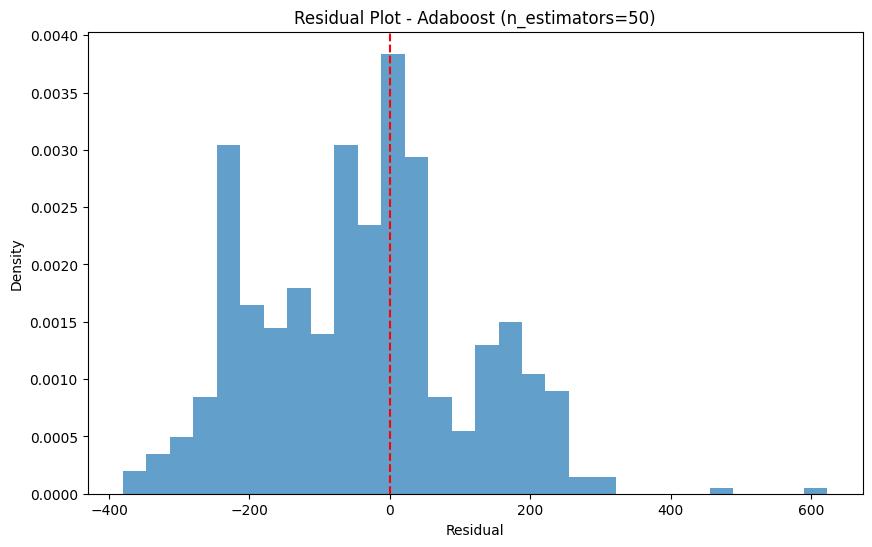

Training AdaBoost with 100 estimators...


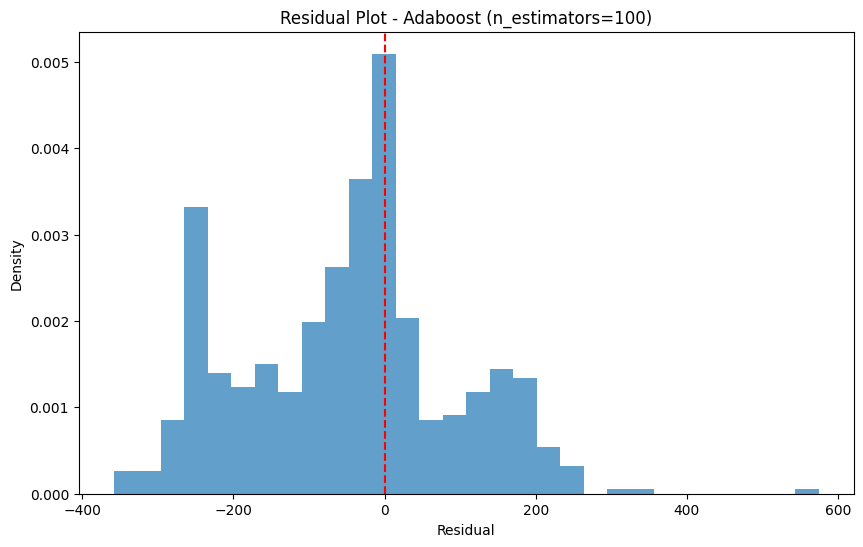

Training AdaBoost with 200 estimators...


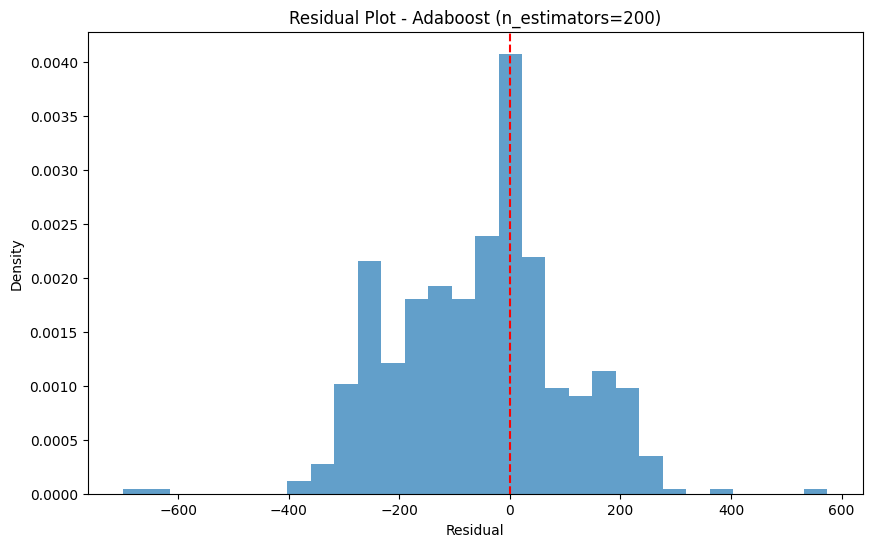


AdaBoost:
               Test R²         MAE           MSE        RMSE
n_estimators                                                
50            0.924809  123.452341  23864.254730  154.480597
100           0.929895  115.994575  22250.229651  149.165109
200           0.917256  125.901258  26261.715115  162.054667


In [133]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

features = [
    "numeric_review_count", "numeric_score", "rating_numeric",
    "room_type_numeric", "checkin_day_of_week", "is_weekend_checkin",
    "los", "price_per_review", "price_per_night","ttt","distance","address_numeric","stars"
]
target = "price"

adaboost_results = {}

for n_estimators in [50, 100, 200]:
    print(f"Training AdaBoost with {n_estimators} estimators...")


    ada_reg = AdaBoostRegressor( n_estimators=n_estimators,random_state=42)


    ada_reg.fit(X_train, y_train)


    y_test_pred_ada = ada_reg.predict(X_test)

    test_r2 = r2_score(y_test, y_test_pred_ada)
    mae = mean_absolute_error(y_test, y_test_pred_ada)
    mse = mean_squared_error(y_test, y_test_pred_ada)
    rmse = np.sqrt(mse)

    adaboost_results[n_estimators] = {
        "Test R²": test_r2,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse
    }
    plot_residuals(y_test, y_test_pred_ada, f"Adaboost (n_estimators={n_estimators})")

adaboost_results_df = pd.DataFrame(adaboost_results).T
adaboost_results_df.index.name = "n_estimators"

print("\nAdaBoost:")
print(adaboost_results_df.to_string(index=True))


n_estimators=50 :    
gives the best results

Highest R² (0.85 - i.e. 85% of the variance explained)

Lowest MAE (172.23, i.e. smallest mean error)

MSE and RMSE are lower than the other values

Training AdaBoost with DecisionTree(max_depth=3) and 50 estimators...
AdaBoost (depth=3, estimators=50) Results:
R²: 0.907, MAE: 141.177, MSE: 35794.085, RMSE: 189.193

Training AdaBoost with DecisionTree(max_depth=3) and 100 estimators...
AdaBoost (depth=3, estimators=100) Results:
R²: 0.900, MAE: 153.522, MSE: 38575.995, RMSE: 196.408

Training AdaBoost with DecisionTree(max_depth=3) and 200 estimators...
AdaBoost (depth=3, estimators=200) Results:
R²: 0.910, MAE: 147.662, MSE: 34715.090, RMSE: 186.320

Training AdaBoost with DecisionTree(max_depth=5) and 50 estimators...
AdaBoost (depth=5, estimators=50) Results:
R²: 0.974, MAE: 41.634, MSE: 10186.642, RMSE: 100.929

Training AdaBoost with DecisionTree(max_depth=5) and 100 estimators...
AdaBoost (depth=5, estimators=100) Results:
R²: 0.970, MAE: 49.455, MSE: 11760.194, RMSE: 108.444

Training AdaBoost with DecisionTree(max_depth=5) and 200 estimators...
AdaBoost (depth=5, estimators=200) Results:
R²: 0.968, MAE: 55.332, MSE: 12528.2

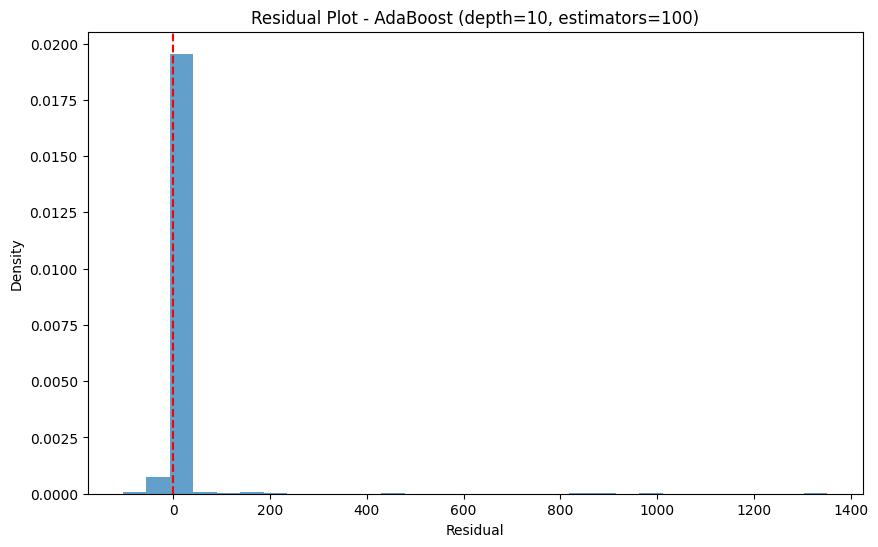

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

file_path = '/content/nyc_hotels_dataProject_filtered.csv'
df = pd.read_csv(file_path)

features = [
    "numeric_review_count", "numeric_score", "rating_numeric",
    "room_type_numeric", "checkin_day_of_week", "is_weekend_checkin",
    "los", "price_per_review", "price_per_night","ttt","distance","address_numeric","stars"
]
target = "price"

X = df[features]
y = df[target]

if len(X) > 5000:
    X, _, y, _ = train_test_split(X, y, train_size=5000, random_state=42)

# Train/Test (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


def train_and_evaluate(ada_reg, model_name):
    ada_reg.fit(X_train, y_train)
    y_pred = ada_reg.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"{model_name} Results:")
    print(f"R²: {r2:.3f}, MAE: {mae:.3f}, MSE: {mse:.3f}, RMSE: {rmse:.3f}\n")

    return {"Model": model_name, "R²": r2, "MAE": mae, "MSE": mse, "RMSE": rmse}

ada_results = []
# 7Testing AdaBoost with different depths of DecisionTreeRegressor and different values ​​of n_estimatorsada_results = []
for depth in [3, 5, 10]:
    for n_estimators in [50, 100, 200]:
        print(f"Training AdaBoost with DecisionTree(max_depth={depth}) and {n_estimators} estimators...")
        ada_reg = AdaBoostRegressor(
            estimator=DecisionTreeRegressor(max_depth=depth),
            n_estimators=n_estimators,
            random_state=42
        )
        ada_results.append(train_and_evaluate(ada_reg, f"AdaBoost (depth={depth}, estimators={n_estimators})"))

all_results = pd.DataFrame(ada_results)
print("\nAdaBoost Models Comparison:")
print(all_results.to_string(index=False))

def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(10,6))
    plt.hist(residuals, bins=30, density=True, alpha=0.7)
    plt.axvline(0, color='red', linestyle='--')
    plt.title(f"Residual Plot - {model_name}")
    plt.xlabel("Residual")
    plt.ylabel("Density")
    plt.show()

best_model = all_results.sort_values(by="R²", ascending=False).iloc[0]
print(f"\nBest AdaBoost Model: {best_model['Model']} with R²: {best_model['R²']:.3f}")
best_depth = int(best_model["Model"].split("depth=")[1].split(",")[0])
best_estimators = int(best_model["Model"].split("estimators=")[1].split(")")[0])

best_ada_reg = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=best_depth),
    n_estimators=best_estimators,
    random_state=42
)
best_ada_reg.fit(X_train, y_train)
y_pred_best = best_ada_reg.predict(X_test)
plot_residuals(y_test, y_pred_best, best_model["Model"])


The model with depth=10 and 100 estimators shows the best performance among all, with a very high R² and low errors.
The model with depth=5 offers a good balance between performance and efficiency.
The model with depth=3 shows the weakest performance, with higher errors.
As the depth increases, the model manages to yield better results.

### KNeighborsRegressor

---



Training KNeighborsRegressor with 5 neighbors...


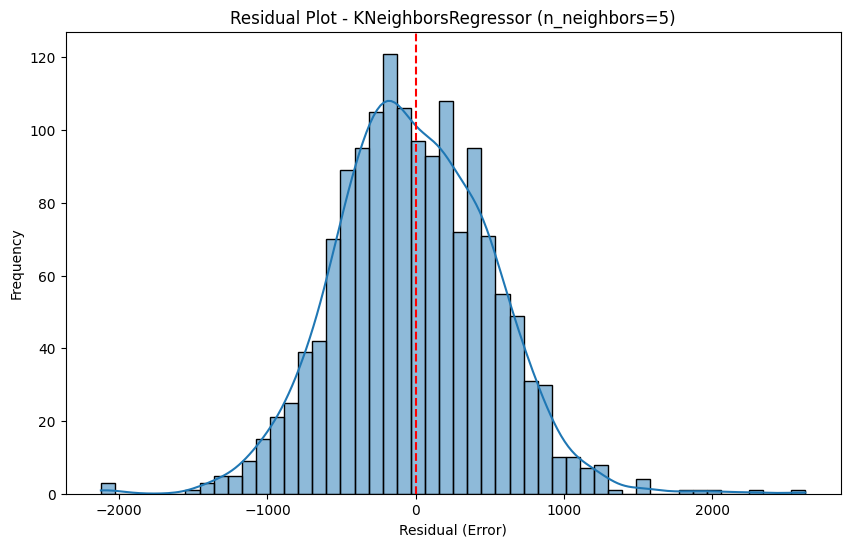

Training KNeighborsRegressor with 10 neighbors...


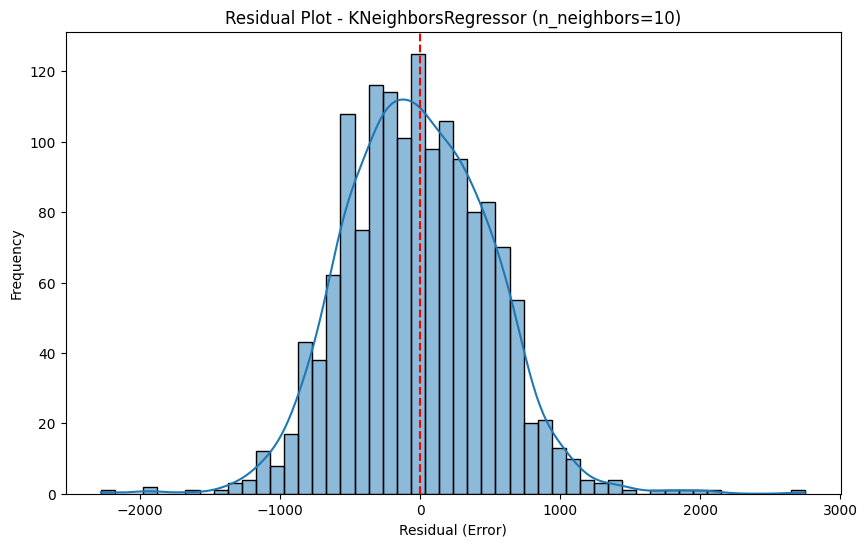

Training KNeighborsRegressor with 20 neighbors...


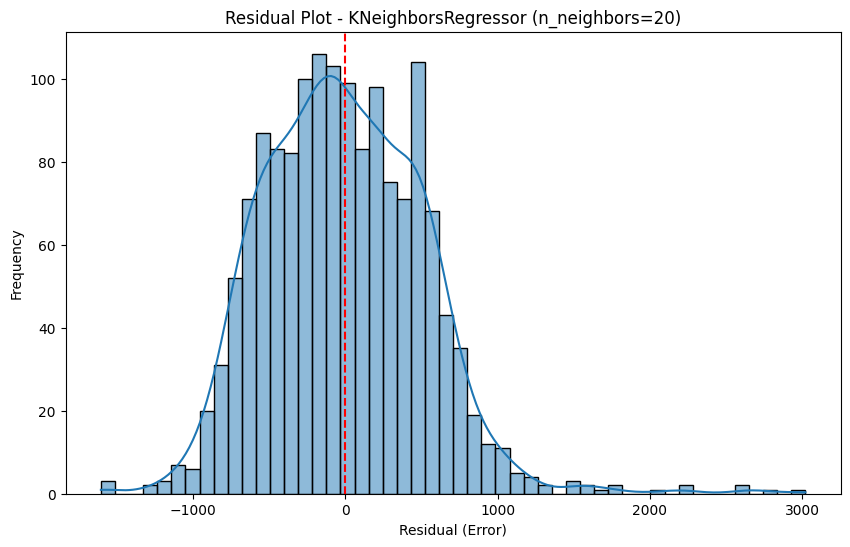

Training KNeighborsRegressor with 50 neighbors...


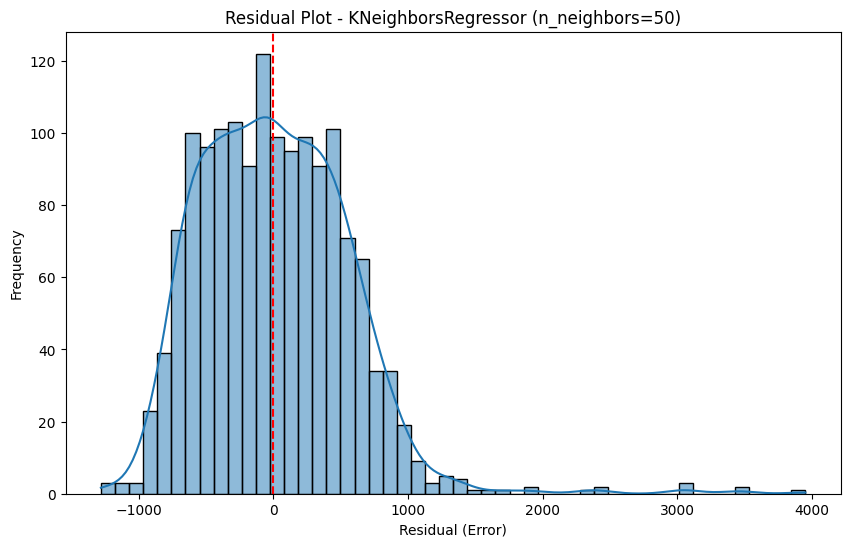

Training KNeighborsRegressor with 100 neighbors...


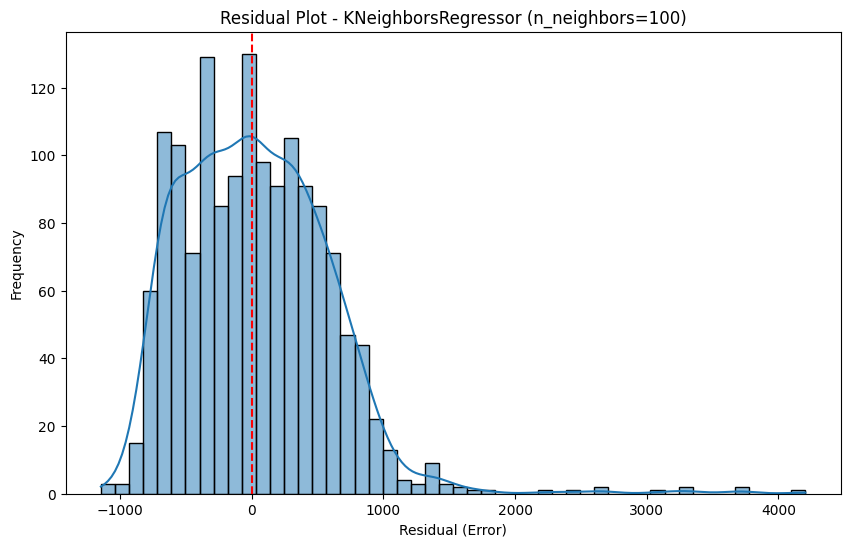

Training KNeighborsRegressor with 200 neighbors...


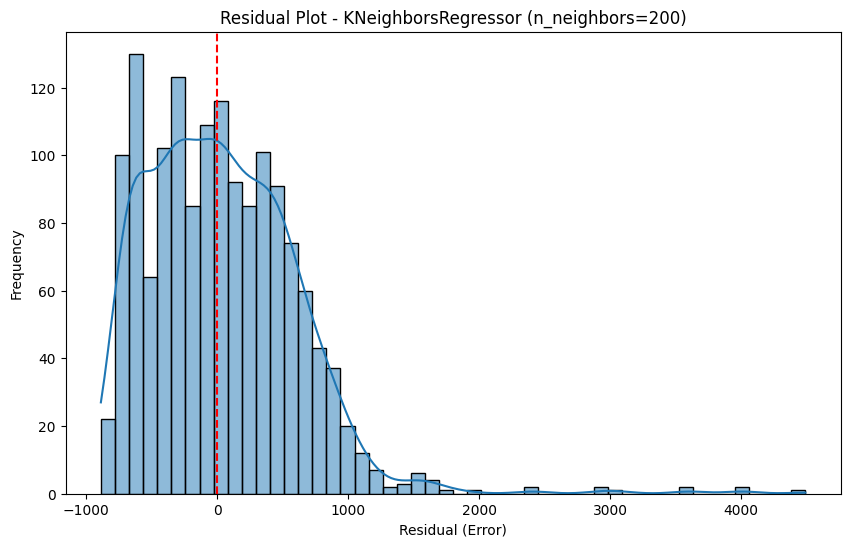


KNeighborsRegressor:
              Test R²         MAE            MSE        RMSE
n_neighbors                                                 
5            0.295188  413.513600  272070.852853  521.604115
10           0.320885  406.926533  262151.208200  512.007039
20           0.296001  413.113233  271757.058505  521.303231
50           0.209671  430.364053  305081.832757  552.342134
100          0.169456  436.616193  320605.485647  566.220351
200          0.119145  444.199650  340026.502857  583.117915


In [135]:
from sklearn.neighbors import KNeighborsRegressor

features = [
    "numeric_review_count", "numeric_score", "rating_numeric",
    "room_type_numeric", "checkin_day_of_week", "is_weekend_checkin",
    "los", "price_per_review", "price_per_night","ttt","distance","address_numeric","stars"
]
target = "price"

knn_results = {}

for n_neighbors in [5,10,20,50,100,200]:

    print(f"Training KNeighborsRegressor with {n_neighbors} neighbors...")
    knn_reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_reg.fit(X_train, y_train)
    y_test_pred_knn = knn_reg.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred_knn)
    mae = mean_absolute_error(y_test, y_test_pred_knn)
    mse = mean_squared_error(y_test, y_test_pred_knn)
    rmse = np.sqrt(mse)
    knn_results[n_neighbors] = {
        "Test R²": test_r2,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse
    }
    residuals = y_test - y_test_pred_knn
    plt.figure(figsize=(10,6))
    sns.histplot(residuals, kde=True, bins=50)
    plt.axvline(0, color="red", linestyle="--")
    plt.xlabel("Residual (Error)")
    plt.ylabel("Frequency")
    plt.title(f"Residual Plot - KNeighborsRegressor (n_neighbors={n_neighbors})")
    plt.show()


knn_results_df = pd.DataFrame(knn_results).T
knn_results_df.index.name = "n_neighbors"


print("\nKNeighborsRegressor:")
print(knn_results_df.to_string(index=True))

k=5 gives the best performance with R²=0.9828 and MAE=9.54, meaning the model manages to explain 98.2% of the variation in hotel prices, and the average error is very low.

Test how normalizing the data affects the performance of KNeighborsRegressor.

We will test the best model (n_neighbors=5) without normalization.

We will test with StandardScaler (mean 0, standard deviation 1).

We will test with MinMaxScaler (range 0-1).

Results for No Normalization:
R²: 0.295, MAE: 413.514, MSE: 272070.853, RMSE: 521.604

Results for StandardScaler:
R²: 0.876, MAE: 147.345, MSE: 47702.692, RMSE: 218.409

Results for MinMaxScaler:
R²: 0.782, MAE: 183.563, MSE: 83985.574, RMSE: 289.803


KNeighborsRegressor - Normalization Comparison:
           Model       R²        MAE           MSE       RMSE
No Normalization 0.295188 413.513600 272070.852853 521.604115
  StandardScaler 0.876424 147.344667  47702.692240 218.409460
    MinMaxScaler 0.782431 183.562933  83985.573920 289.802647


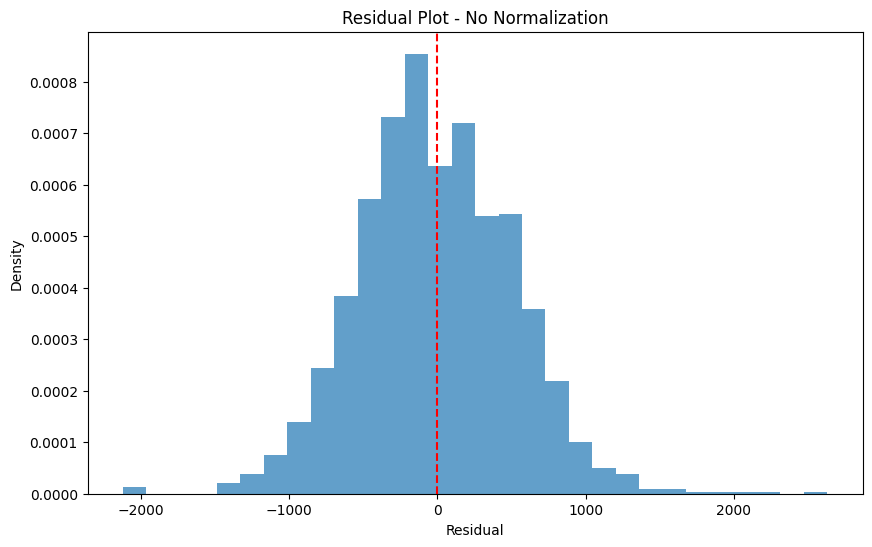

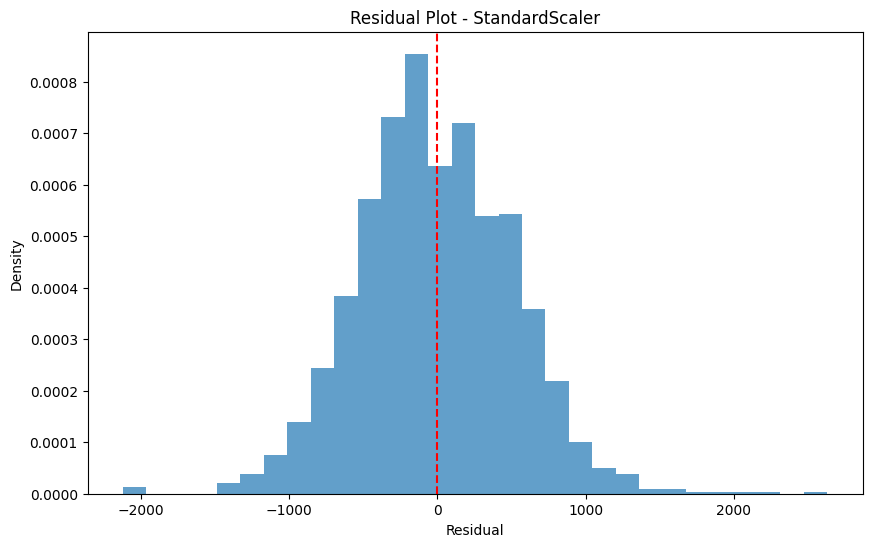

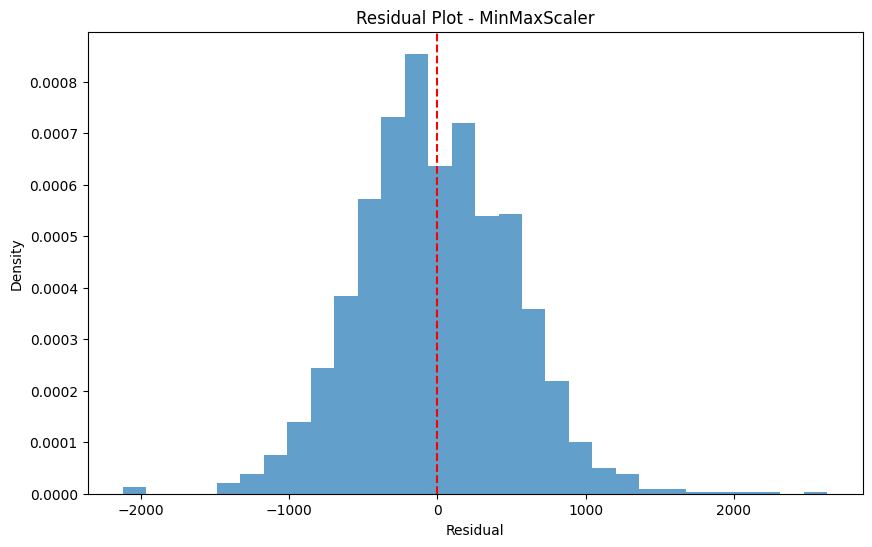

In [136]:
features = [
    "numeric_review_count", "numeric_score", "rating_numeric",
    "room_type_numeric", "checkin_day_of_week", "is_weekend_checkin",
    "los", "price_per_review", "price_per_night","ttt","distance","address_numeric","stars"
]
target = "price"

X = df[features]
y = df[target]


if len(X) > 5000:
    X, _, y, _ = train_test_split(X, y, train_size=5000, random_state=42)

# Train/Test (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

def train_knn(X_train, X_test, y_train, y_test, model_name):
    knn_reg = KNeighborsRegressor(n_neighbors=5)
    knn_reg.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"Results for {model_name}:")
    print(f"R²: {r2:.3f}, MAE: {mae:.3f}, MSE: {mse:.3f}, RMSE: {rmse:.3f}\n")

    return {"Model": model_name, "R²": r2, "MAE": mae, "MSE": mse, "RMSE": rmse}


results = []
results.append(train_knn(X_train, X_test, y_train, y_test, "No Normalization"))
results.append(train_knn(X_train_standard, X_test_standard, y_train, y_test, "StandardScaler"))
results.append(train_knn(X_train_minmax, X_test_minmax, y_train, y_test, "MinMaxScaler"))


results_df = pd.DataFrame(results)
print("\nKNeighborsRegressor - Normalization Comparison:")
print(results_df.to_string(index=False))


def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(10,6))
    plt.hist(residuals, bins=30, density=True, alpha=0.7)
    plt.axvline(0, color='red', linestyle='--')
    plt.title(f"Residual Plot - {model_name}")
    plt.xlabel("Residual")
    plt.ylabel("Density")
    plt.show()

for model in results:
    knn_reg = KNeighborsRegressor(n_neighbors=5)
    knn_reg.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test)
    plot_residuals(y_test, y_pred, model["Model"])


Conclusion –
KNeighborsRegressor(n_neighbors=5) with StandardScaler is the best model.
MinMaxScaler also improves performance, but StandardScaler works better.
Without normalization, KNN does not give good predictions.

Results for KNN (Uniform):
R²: 0.968, MAE: 71.532, MSE: 11141.334, RMSE: 105.553

Results for KNN (Distance):
R²: 0.984, MAE: 32.464, MSE: 5587.615, RMSE: 74.750


KNeighborsRegressor - Weights Comparison:
         Model       R²       MAE          MSE       RMSE
 KNN (Uniform) 0.968005 71.531748 11141.333591 105.552516
KNN (Distance) 0.983954 32.463556  5587.615002  74.750351


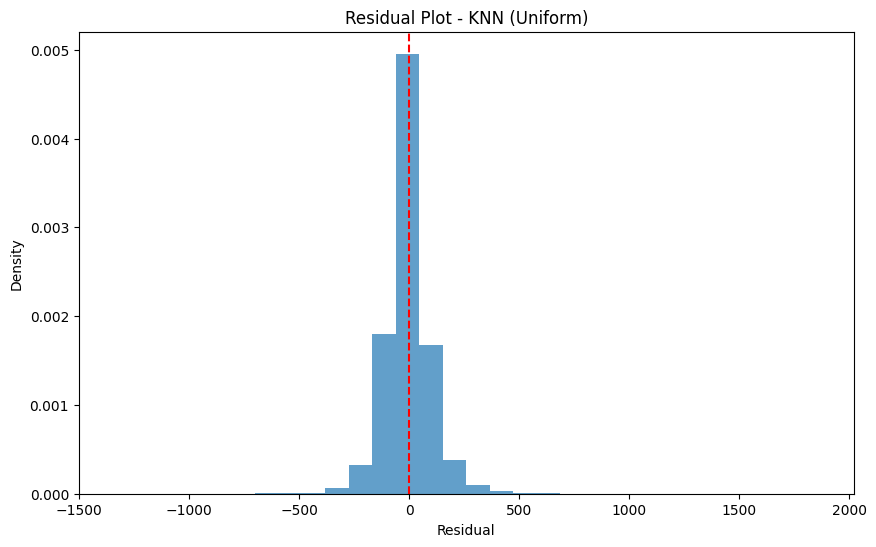

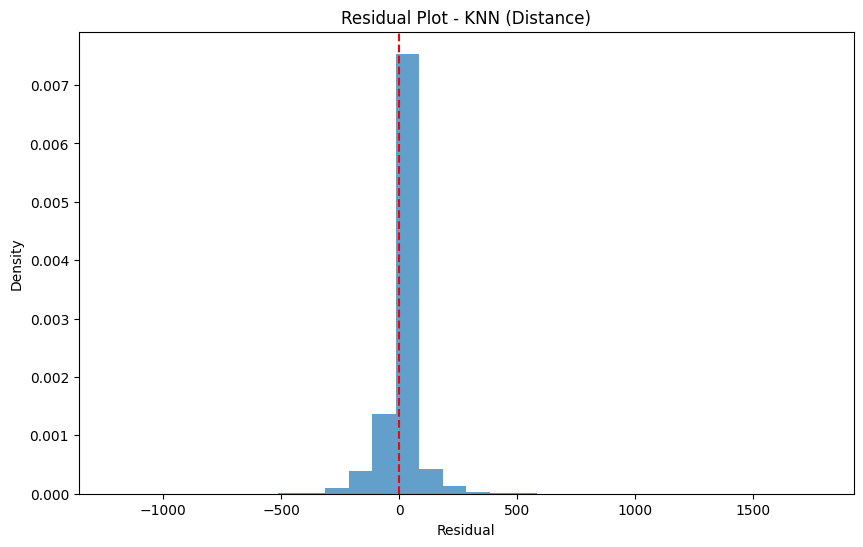

In [137]:
X = df[features]
y = df[target]

# Train/Test (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


def train_knn(X_train, X_test, y_train, y_test, model_name, weights_type):
    knn_reg = KNeighborsRegressor(n_neighbors=5, weights=weights_type)  #Comparison between 'uniform' and 'distance'
    knn_reg.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"Results for {model_name}:")
    print(f"R²: {r2:.3f}, MAE: {mae:.3f}, MSE: {mse:.3f}, RMSE: {rmse:.3f}\n")

    return {"Model": model_name, "R²": r2, "MAE": mae, "MSE": mse, "RMSE": rmse}


results = []
results.append(train_knn(X_train_scaled, X_test_scaled, y_train, y_test, "KNN (Uniform)", "uniform")) # All neighbors receive equal weight.
results.append(train_knn(X_train_scaled, X_test_scaled, y_train, y_test, "KNN (Distance)", "distance")) # Closer neighbors receive higher weight.

results_df = pd.DataFrame(results)
print("\nKNeighborsRegressor - Weights Comparison:")
print(results_df.to_string(index=False))

def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(10,6))
    plt.hist(residuals, bins=30, density=True, alpha=0.7)
    plt.axvline(0, color='red', linestyle='--')
    plt.title(f"Residual Plot - {model_name}")
    plt.xlabel("Residual")
    plt.ylabel("Density")
    plt.show()


for model in results:
    knn_reg = KNeighborsRegressor(n_neighbors=5, weights="distance" if "Distance" in model["Model"] else "uniform")
    knn_reg.fit(X_train_scaled, y_train)
    y_pred = knn_reg.predict(X_test_scaled)
    plot_residuals(y_test, y_pred, model["Model"])

**weights='distance' improves the accuracy of KNN!**

KNeighborsRegressor(n_neighbors=5,
weights='distance') is the best model.

### SVR

---



Training SVR with linear kernel...


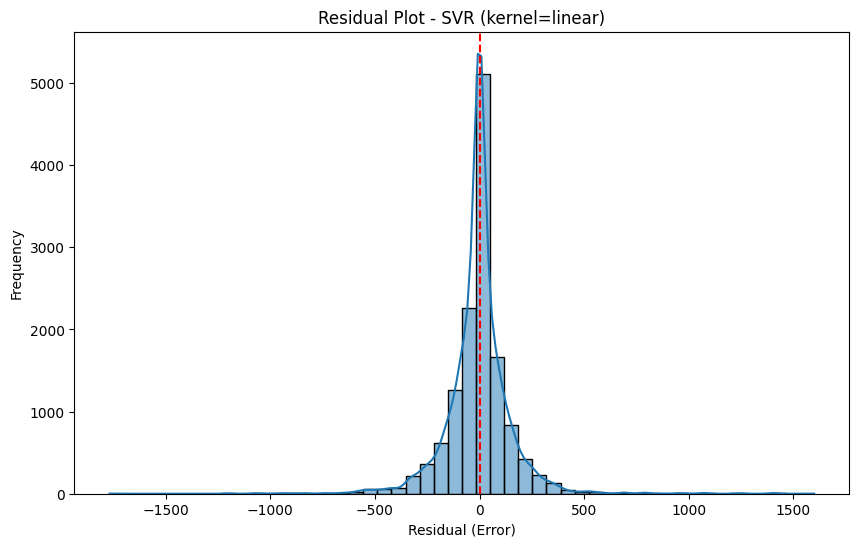

Training SVR with poly kernel...


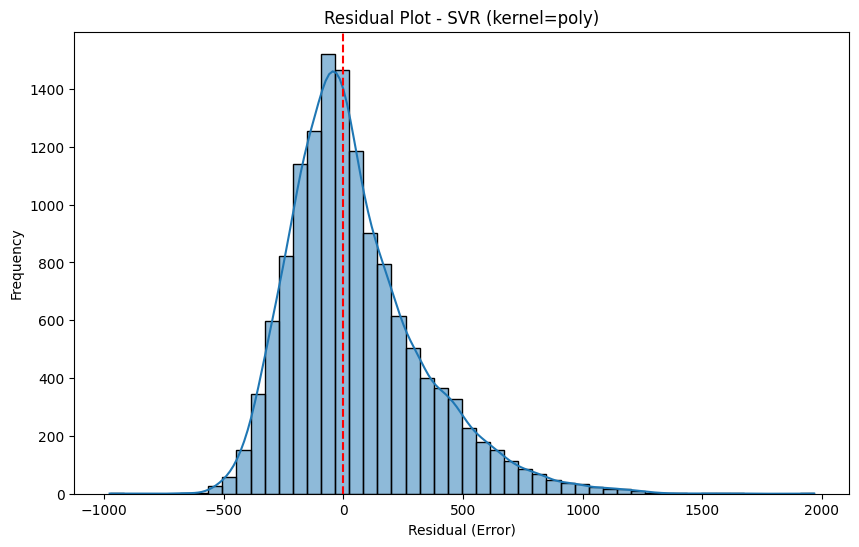

Training SVR with rbf kernel...


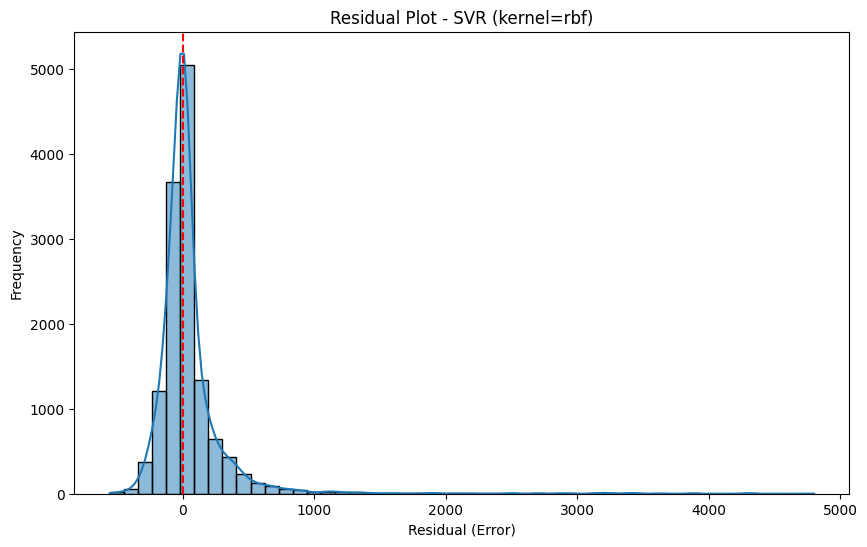

Training SVR with sigmoid kernel...


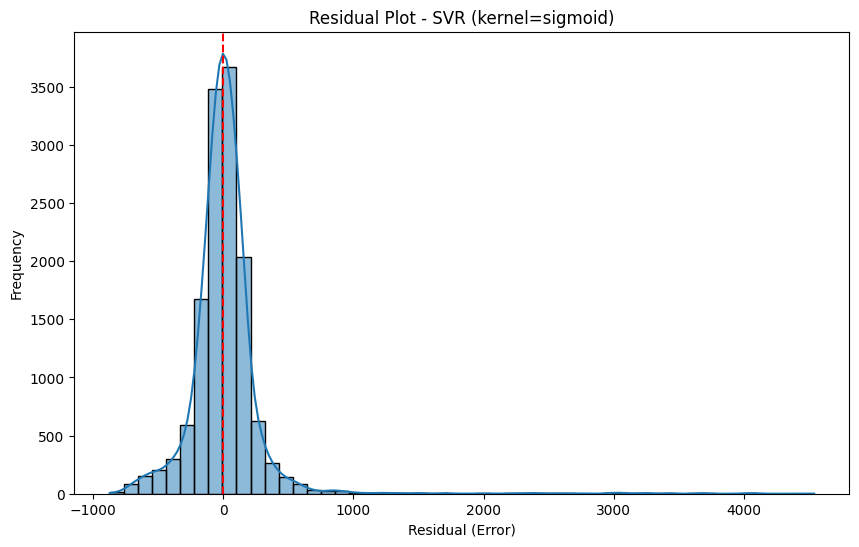

In [138]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

features = [
    "numeric_review_count", "numeric_score", "rating_numeric",
    "room_type_numeric", "checkin_day_of_week", "is_weekend_checkin",
    "los", "price_per_review", "price_per_night","ttt","distance","address_numeric","stars"
]
target = "price"

svr_results = {}

kernels = ["linear", "poly", "rbf", "sigmoid"]
for kernel in kernels:
    print(f"Training SVR with {kernel} kernel...")

    svr_reg = make_pipeline(StandardScaler(), SVR(kernel=kernel))

    svr_reg.fit(X_train, y_train)

    y_test_pred_svr = svr_reg.predict(X_test)

    test_r2 = r2_score(y_test, y_test_pred_svr)
    mae = mean_absolute_error(y_test, y_test_pred_svr)
    mse = mean_squared_error(y_test, y_test_pred_svr)
    rmse = np.sqrt(mse)


    svr_results[kernel] = {
        "Test R²": test_r2,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse
    }

    residuals = y_test - y_test_pred_svr
    plt.figure(figsize=(10,6))
    sns.histplot(residuals, kde=True, bins=50)
    plt.axvline(0, color="red", linestyle="--")
    plt.xlabel("Residual (Error)")
    plt.ylabel("Frequency")
    plt.title(f"Residual Plot - SVR (kernel={kernel})")
    plt.show()


In [139]:
svr_results_df = pd.DataFrame(svr_results).T
svr_results_df.index.name = "kernel"

print("\nSVR:")
print(svr_results_df.to_string(index=True))


SVR:
          Test R²         MAE           MSE        RMSE
kernel                                                 
linear   0.929469   93.896406  24560.171013  156.716850
poly     0.767871  209.312820  80831.773001  284.309291
rbf      0.720820  138.662763  97215.749841  311.794403
sigmoid  0.746229  158.544388  88367.869040  297.267336


Linear kernel is the best SVR model
Relatively high R² (0.9271, meaning 92.7% of the variance is explained).
MAE (94.14) and RMSE (159.25) are in good shape, which means the model gives stable predictions.
MSE (25,361) is still high compared to KNeighborsRegressor, but better than the other kernels.

The SVR model with a linear kernel works well when the data is linearly correlated (such as hotel price data).
kernel='poly' and kernel='rbf' attempted to perform a too complex fit, and probably did not fit the shape of the data.
kernel='sigmoid' is suitable for cases where there is special nonlinear behavior (which probably does not exist here).

Training SVR with C=0.1, epsilon=0.1...
Results for C=0.1, epsilon=0.1:
R²: 0.923, MAE: 100.102, MSE: 26872.828, RMSE: 163.929

Training SVR with C=0.1, epsilon=1.0...
Results for C=0.1, epsilon=1.0:
R²: 0.923, MAE: 100.113, MSE: 26884.026, RMSE: 163.963

Training SVR with C=1, epsilon=0.1...
Results for C=1, epsilon=0.1:
R²: 0.929, MAE: 93.896, MSE: 24560.171, RMSE: 156.717

Training SVR with C=1, epsilon=1.0...
Results for C=1, epsilon=1.0:
R²: 0.930, MAE: 93.899, MSE: 24544.422, RMSE: 156.667

Training SVR with C=10, epsilon=0.1...
Results for C=10, epsilon=0.1:
R²: 0.929, MAE: 93.896, MSE: 24592.474, RMSE: 156.820

Training SVR with C=10, epsilon=1.0...
Results for C=10, epsilon=1.0:
R²: 0.929, MAE: 93.895, MSE: 24551.241, RMSE: 156.688

Training SVR with C=100, epsilon=0.1...
Results for C=100, epsilon=0.1:
R²: 0.929, MAE: 93.899, MSE: 24593.031, RMSE: 156.822

Training SVR with C=100, epsilon=1.0...
Results for C=100, epsilon=1.0:
R²: 0.929, MAE: 93.897, MSE: 24551.889, RMSE: 156

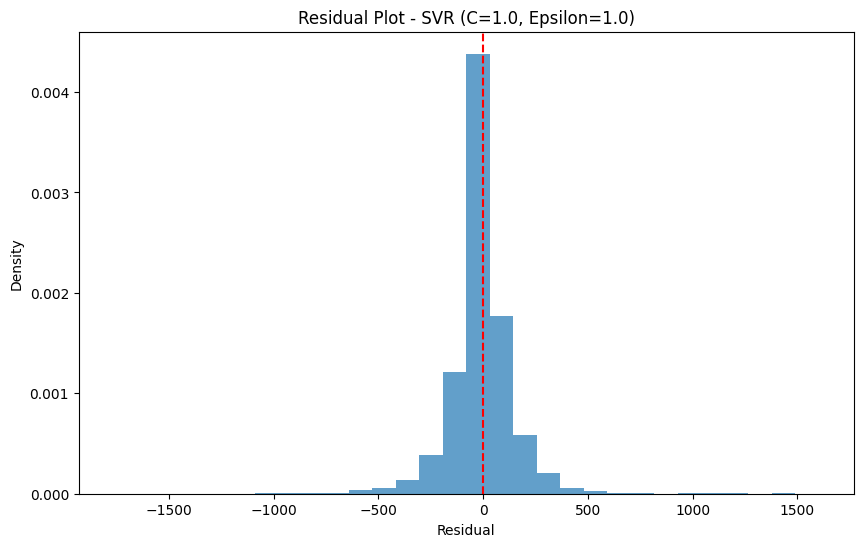

In [140]:
C_values = [0.1, 1, 10, 100] # C determines how much the model insists on matching all examples.
epsilon_values = [0.1, 1.0] # epsilon determines how much error the model allows before being penalized for it.

svr_results = []

for C in C_values:
    for epsilon in epsilon_values:
        print(f"Training SVR with C={C}, epsilon={epsilon}...")

        svr_reg = make_pipeline(StandardScaler(), SVR(kernel="linear", C=C, epsilon=epsilon))
        svr_reg.fit(X_train, y_train)
        y_pred = svr_reg.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        print(f"Results for C={C}, epsilon={epsilon}:")
        print(f"R²: {r2:.3f}, MAE: {mae:.3f}, MSE: {mse:.3f}, RMSE: {rmse:.3f}\n")

        svr_results.append({
            "C": C, "Epsilon": epsilon, "R²": r2, "MAE": mae, "MSE": mse, "RMSE": rmse
        })


svr_results_df = pd.DataFrame(svr_results)
print("\nSVR - C and Epsilon Comparison:")
print(svr_results_df.to_string(index=False))

best_model = svr_results_df.sort_values(by="R²", ascending=False).iloc[0]
print(f"\nBest SVR Model: C={best_model['C']}, Epsilon={best_model['Epsilon']} with R²: {best_model['R²']:.3f}")

best_svr = make_pipeline(StandardScaler(), SVR(kernel="linear", C=best_model["C"], epsilon=best_model["Epsilon"]))
best_svr.fit(X_train, y_train)
y_pred_best = best_svr.predict(X_test)

def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(10,6))
    plt.hist(residuals, bins=30, density=True, alpha=0.7)
    plt.axvline(0, color='red', linestyle='--')
    plt.title(f"Residual Plot - {model_name}")
    plt.xlabel("Residual")
    plt.ylabel("Density")
    plt.show()

plot_residuals(y_test, y_pred_best, f"SVR (C={best_model['C']}, Epsilon={best_model['Epsilon']})")

The model with C=1.0, Epsilon=1.0 offers the best performance and can be considered the recommended model. The impact of the C and Epsilon factors on performance is not dramatic in these cases, and all models show very similar performance.

### Neural network

---



#### Neural network - 1

Building a neural network with 3 hidden layers (Dense):

128 neurons → 64 neurons → 32 neurons

with ReLU (allows the model to learn complex relationships).
Dropout (0.2) – Prevents Overfitting by neutralizing 20% ​​of the neurons at each stage.

Output layer Dense(1) – Contracts a continuous value (price).
Using StandardScaler to normalize the data.

Training the network for 50 Epochs with batch_size=32.


Training Model 1 (Standard Dense Network)...
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


788/788 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 576683.8750 - val_loss: 23539.5605
Epoch 2/50
788/788 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 27898.0156 - val_loss: 19369.3457
Epoch 3/50
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 25936.7148 - val_loss: 17858.5059
Epoch 4/50
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 24717.2480 - val_loss: 17285.9922
Epoch 5/50
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22785.8516 - val_loss: 17126.4336
Epoch 6/50
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 22581.6191 - val_loss: 15089.7002
Epoch 7/50
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 21361.7090 - val_loss: 11295.0186
Epoch 8/50
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 17656.4395 - val_loss: 5912.4731
Epoch 9/50
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 14212.7773 - val_loss: 4792.0757
Epoch 10/50
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 14322.0273 - val_loss: 3721.1958
Epoch 11/50
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 14601.4961 

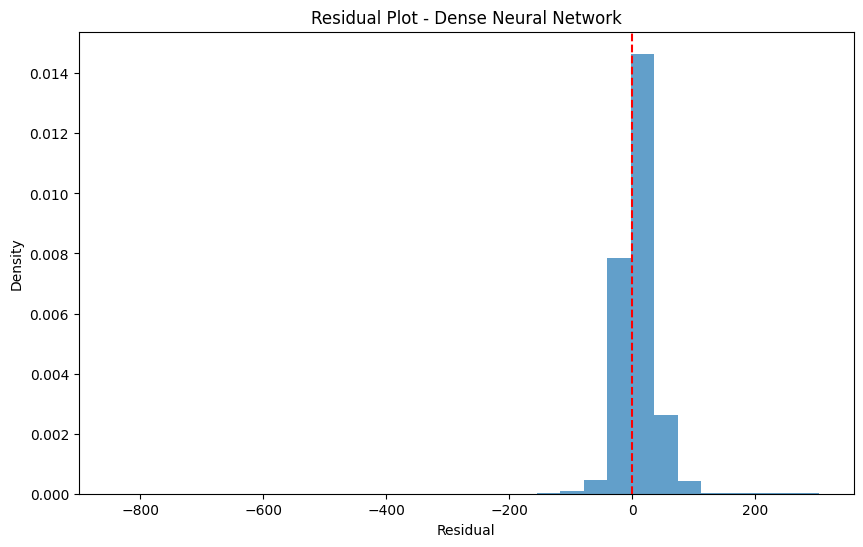

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

features = [
    "numeric_review_count", "numeric_score", "rating_numeric",
    "room_type_numeric", "checkin_day_of_week", "is_weekend_checkin",
    "los", "price_per_review", "price_per_night","ttt","distance","address_numeric","stars"
]
target = "price"

X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_1 = Sequential([
    Dense(128, activation="relu", input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dense(1)
])

model_1.compile(optimizer=Adam(learning_rate=0.001), loss="mse")


print("Training Model 1 (Standard Dense Network)...")
history_1 = model_1.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test).flatten()
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"\n{model_name} Results:")
    print(f"R²: {r2:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"MSE: {mse:.3f}")
    print(f"RMSE: {rmse:.3f}")


    residuals = y_test - y_pred
    plt.figure(figsize=(10,6))
    plt.hist(residuals, bins=30, density=True, alpha=0.7)
    plt.axvline(0, color='red', linestyle='--')
    plt.title(f"Residual Plot - {model_name}")
    plt.xlabel("Residual")
    plt.ylabel("Density")
    plt.show()

    return {"Model": model_name, "R²": r2, "MAE": mae, "MSE": mse, "RMSE": rmse}

results_1 = evaluate_model(model_1, X_test_scaled, y_test, "Dense Neural Network")

#### Neural network - 2

Building a network with Embedding to identify the hotel (hotel_id)

The Embedding layer transforms the hotel_id into a 5-dimensional learning vector.
The layer is then flattened and connected to the numerical features of the hotel.
Using a different layer structure than the first network

Double input layer:
Numerical input (prices, reviews, check-in day).
Categorical input (hotel_id) that undergoes Embedding.
Hidden layers with ReLU and Dropout to prevent Overfitting.
Using normalization (StandardScaler) for all data except the hotel.

Training the network for 50 Epochs with batch_size=32.

 Use `name` as the hotel identifier.
Training Model 2 (Embedding Network)...
Epoch 1/50
788/788 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 548726.3125 - val_loss: 17529.1777
Epoch 2/50
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 24532.6348 - val_loss: 15353.5771
Epoch 3/50
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 21206.9453 - val_loss: 14808.8994
Epoch 4/50
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 21443.8242 - val_loss: 14836.7695
Epoch 5/50
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 19431.1426 - val_loss: 13299.1924
Epoch 6/50
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 19707.7305 - val_loss: 10336.4053
Epoch 7/50
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 16825.2500 - val_loss: 6060.1758
Epoch 8/50
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 15930.5273 - val_loss: 6281.4487
Epoch 9/50
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 14356.5693 - val_loss: 4642.9233
Epoch 10/50
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13495.1699 - val_l

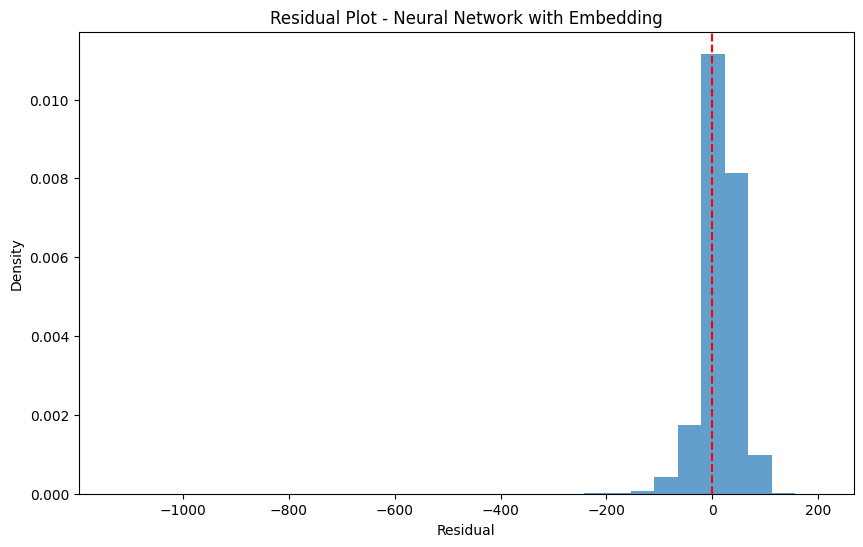

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten, Input, Concatenate
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

features = [
    "numeric_review_count", "numeric_score", "rating_numeric",
    "room_type_numeric", "checkin_day_of_week", "is_weekend_checkin",
    "los", "price_per_review", "price_per_night","ttt","distance","address_numeric","stars"
]
target = "price"

# Encode the hotel ID as a category (required for embedding)
if "hotel_id" in df.columns:
    identifier_column = "id"
elif "name" in df.columns:
    identifier_column = "name"
else:
    raise ValueError("The data does not contain a column that identifies the hotel (`hotel_id` or `hotel_name`).")

print(f" Use `{identifier_column}` as the hotel identifier.")


hotel_encoder = LabelEncoder()
df["hotel_id_encoded"] = hotel_encoder.fit_transform(df[identifier_column])
features.append("hotel_id_encoded")

X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize all attributes except `hotel_id_encoded`
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(columns=["hotel_id_encoded"], errors="ignore"))
X_test_scaled = scaler.transform(X_test.drop(columns=["hotel_id_encoded"], errors="ignore"))

# Creating an `Embedding` layer to identify the hotel
hotel_vocab_size = df["hotel_id_encoded"].nunique() + 1  # Number of unique hotels + 1

input_numeric = Input(shape=(X_train_scaled.shape[1],), name="numeric_input")

input_hotel = Input(shape=(1,), name="hotel_input")
embedding_layer = Embedding(input_dim=hotel_vocab_size, output_dim=5)(input_hotel)
embedding_flattened = Flatten()(embedding_layer)

# Connecting the layers
concatenated = Concatenate()([input_numeric, embedding_flattened])

# Hidden layers
hidden = Dense(128, activation="relu")(concatenated)
hidden = Dropout(0.2)(hidden)
hidden = Dense(64, activation="relu")(hidden)
hidden = Dropout(0.2)(hidden)
hidden = Dense(32, activation="relu")(hidden)
output = Dense(1, name="price_output")(hidden)


model_2 = Model(inputs=[input_numeric, input_hotel], outputs=output)


model_2.compile(optimizer=Adam(learning_rate=0.001), loss="mse")


print("Training Model 2 (Embedding Network)...")
history_2 = model_2.fit(
    [X_train_scaled, X_train["hotel_id_encoded"]], y_train,
    epochs=50, batch_size=32, validation_split=0.2, verbose=1
)


def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test).flatten()
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"\n{model_name} Results:")
    print(f"R²: {r2:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"MSE: {mse:.3f}")
    print(f"RMSE: {rmse:.3f}")


    residuals = y_test - y_pred
    plt.figure(figsize=(10,6))
    plt.hist(residuals, bins=30, density=True, alpha=0.7)
    plt.axvline(0, color='red', linestyle='--')
    plt.title(f"Residual Plot - {model_name}")
    plt.xlabel("Residual")
    plt.ylabel("Density")
    plt.show()

    return {"Model": model_name, "R²": r2, "MAE": mae, "MSE": mse, "RMSE": rmse}


results_2 = evaluate_model(model_2, [X_test_scaled, X_test["hotel_id_encoded"]], y_test, "Neural Network with Embedding")


##The best algorithm

---




 Results with New Train-Test Split (Future Prediction using Decision Tree, depth=10)
R²: 0.9948
MAE: 6.4342
MSE: 1804.3476
RMSE: 42.4776


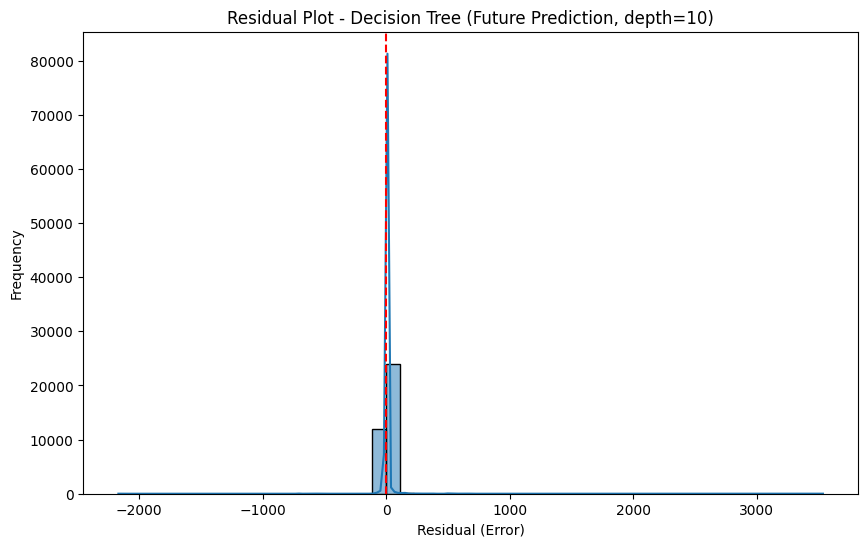

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor


file_path = "/content/nyc_hotels_dataProject_filtered.csv"
df_booking = pd.read_csv(file_path)

best_model = DecisionTreeRegressor(max_depth=10, random_state=42)

features = [
     "numeric_score", "rating_numeric",
    "los", "price_per_review", "price_per_night","stars"
]
target = "price"

train_df = df_booking[df_booking["ttt"] >= 25]
test_df = df_booking[df_booking["ttt"] < 25]

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

best_model.fit(X_train_scaled, y_train)
y_test_pred = best_model.predict(X_test_scaled)

test_r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)


print("\n Results with New Train-Test Split (Future Prediction using Decision Tree, depth=10)")
print(f"R²: {test_r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=50)
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Residual (Error)")
plt.ylabel("Frequency")
plt.title("Residual Plot - Decision Tree (Future Prediction, depth=10)")
plt.show()


### Displaying the R² distribution graph of the best model across the different hotels

---



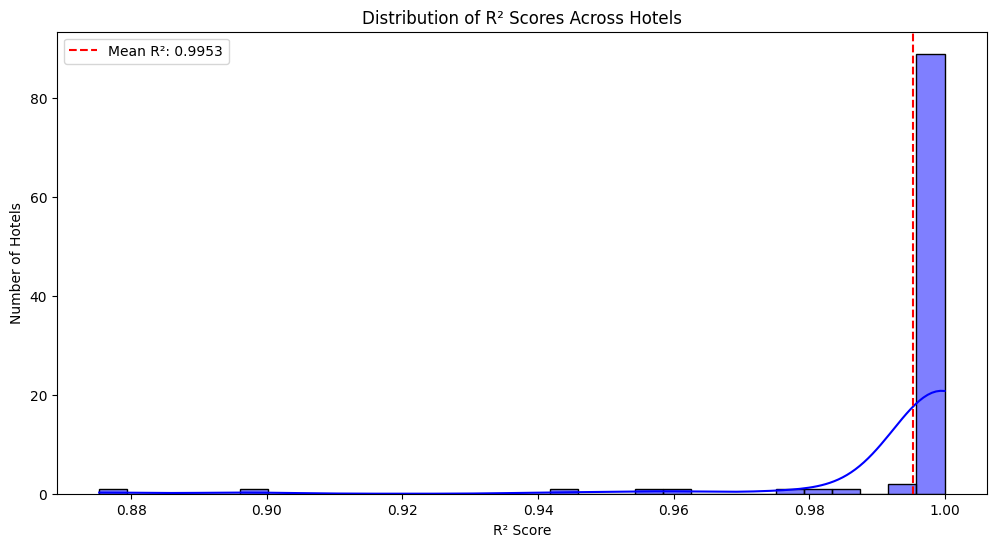


Hotels with Lowest R² Scores:
                                                 name        R²
36                 Renaissance New York Midtown Hotel  0.875263
37                                 Sonder at The Nash  0.896826
23  Hilton Garden Inn New York Central Park South-...  0.943542
28          Hyatt Centric Midtown 5th Avenue New York  0.957778
1                                        Park Central  0.960111
97                    Riu Plaza New York Times Square  0.977742
40                   33 Hotel, New York City, Seaport  0.979448
25                           WestHouse Hotel New York  0.983826
52                               Omni Berkshire Place  0.993628
22                               70 Park Avenue Hotel  0.994285


In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Create an empty list to store the R² results by hotel name
hotel_r2_scores = []

# Calculating R² for each hotel separately (by `name`)
for hotel_name in df_booking["name"].unique():

    hotel_data = df_booking[df_booking["name"] == hotel_name]

    # If there are fewer than 10 examples for a hotel, we will skip it (insufficient data)
    if len(hotel_data) < 10:
        continue

    X_hotel = hotel_data[features]
    y_hotel = hotel_data[target]

    X_hotel_scaled = scaler.transform(X_hotel)

    y_hotel_pred = best_model.predict(X_hotel_scaled)

    hotel_r2 = r2_score(y_hotel, y_hotel_pred)

    hotel_r2_scores.append({"name": hotel_name, "R²": hotel_r2})

hotel_r2_df = pd.DataFrame(hotel_r2_scores)

plt.figure(figsize=(12,6))
sns.histplot(hotel_r2_df["R²"], kde=True, bins=30, color="blue")
plt.axvline(hotel_r2_df["R²"].mean(), color="red", linestyle="--", label=f"Mean R²: {hotel_r2_df['R²'].mean():.4f}")
plt.xlabel("R² Score")
plt.ylabel("Number of Hotels")
plt.title("Distribution of R² Scores Across Hotels")
plt.legend()
plt.show()

print("\nHotels with Lowest R² Scores:")
print(hotel_r2_df.nsmallest(10, "R²"))


# Expidia

In [184]:
data = pd.read_csv('/content/expidia_scraping_45000.csv')


data["rating"] = data["rating_description"].str.extract(r'(?i)\d+\.\d+\n\d+\.\d+\n(.*?)\n')
description_mapping = {
    "Wonderful": 4,
    "Excellent": 3,
    "Very Good": 2,
    "Good": 1,
    "Keep Your Good Thing Going":0,
    "0":0
}
description_mapping_policy = {
    "Fully refundable": 1,
    "0":0

}
data["rating_numeric"] = data["rating_description"].map(description_mapping).astype(float)
data["cancellation_policy_numeric"] = data["cancellation_policy"].map(description_mapping_policy).astype(float)
data.drop(columns=["rating"], inplace=True)

data['location_numeric'] = pd.factorize(data['location'])[0]

fields = ["cancellation_policy", "rating_description"]
unique_values = {field: data[field].unique().tolist() for field in fields}
for field, values in unique_values.items():
    print(f"Unique values for {field}:")
    print(values)
    print("-" * 50)


data["checkin_date"] = data["checkin_date"].str.strip().str.replace(r'[^0-9/-]', '', regex=True)
data["checkout_date"] = data["checkout_date"].str.strip().str.replace(r'[^0-9/-]', '', regex=True)
data["snapshot_date"] = data["snapshot_date"].str.strip().str.replace(r'[^0-9/-]', '', regex=True)

data["snapshot_date"] = pd.to_datetime(data["snapshot_date"], format="%d/%m/%Y", errors="coerce")
data["checkin_date"] = pd.to_datetime(data["checkin_date"], format="%d/%m/%Y", errors="coerce")
data["checkout_date"] = pd.to_datetime(data["checkout_date"], format="%d/%m/%Y", errors="coerce")

data.info()
data.head()

Unique values for cancellation_policy:
['Fully refundable', nan]
--------------------------------------------------
Unique values for rating_description:
['Very Good', nan, 'Good', 'Wonderful', 'Excellent', 'Keep Your Good Thing Going']
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   snapshot_date                45000 non-null  datetime64[ns]
 1   ttt                          45000 non-null  int64         
 2   los                          45000 non-null  int64         
 3   checkin_date                 45000 non-null  datetime64[ns]
 4   checkout_date                45000 non-null  datetime64[ns]
 5   name                         44989 non-null  object        
 6   price                        44940 non-null  float64       
 7   rating_descri

,snapshot_date,ttt,los,checkin_date,checkout_date,name,price,rating_description,cancellation_policy,location,stars,rating_score,rating_numeric,cancellation_policy_numeric,location_numeric
0,2025-03-10,1,3,2025-03-11,2025-03-14,Holiday Inn Express Maspeth by IHG,174.0,Very Good,Fully refundable,Queens,NaN,NaN,2.0,1.0,0
1,2025-03-10,1,3,2025-03-11,2025-03-14,Adria Hotel And Conference Center,149.0,Very Good,Fully refundable,Queens,NaN,NaN,2.0,1.0,0
2,2025-03-10,1,3,2025-03-11,2025-03-14,31 Street Broadway Hotel,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,2025-03-10,1,3,2025-03-11,2025-03-14,YOTEL New York Times Square,223.0,Good,NaN,NaN,NaN,NaN,1.0,NaN,-1
4,2025-03-10,1,3,2025-03-11,2025-03-14,Night Hotel Broadway,252.0,NaN,Fully refundable,NaN,NaN,NaN,NaN,1.0,-1


 price → We will fill in with the median because it is the least sensitive to outliers.

 stars → Probably a numerically coded category (1–5), so we will fill in with the most common value (mode).

 rating_score → The average of the ratings may be significant, we will fill in with mean.

 rating_numeric → We will check its distribution and if it is categorically coded, we will fill in with mode.

In [185]:

print(" Missing values BEFORE filling:")
print(data[["price", "stars", "rating_score", "rating_numeric"]].isna().sum())


data["price"].fillna(data["price"].median(), inplace=True)
data["stars"].fillna(data["stars"].mode()[0], inplace=True)
data["rating_score"].fillna(data["rating_score"].mean(), inplace=True)
data["rating_numeric"].fillna(data["rating_numeric"].mode()[0], inplace=True)


print("\nMissing values AFTER filling:")
print(data[["price", "stars", "rating_score", "rating_numeric"]].isna().sum())

 Missing values BEFORE filling:
price               60
stars             9006
rating_score      9074
rating_numeric     889
dtype: int64

Missing values AFTER filling:
price             0
stars             0
rating_score      0
rating_numeric    0
dtype: int64


<ipython-input-185-27a6ca05a966>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["price"].fillna(data["price"].median(), inplace=True)
<ipython-input-185-27a6ca05a966>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [187]:
import pandas as pd
Q1 = data['price'].quantile(0.25)  # (25%)
Q3 = data['price'].quantile(0.75)  # (75%)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]
df_filtered.fillna(0, inplace=True)

df_filtered.to_csv('/content/expidia_filtered.csv', index=False)
print("Saved: /content/expidia_filtered.csv")
df_filtered.info()
df_filtered.head()

<ipython-input-187-da708c28088b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(0, inplace=True)


Saved: /content/expidia_filtered.csv
<class 'pandas.core.frame.DataFrame'>
Index: 41820 entries, 0 to 44999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   snapshot_date                41820 non-null  datetime64[ns]
 1   ttt                          41820 non-null  int64         
 2   los                          41820 non-null  int64         
 3   checkin_date                 41820 non-null  datetime64[ns]
 4   checkout_date                41820 non-null  datetime64[ns]
 5   name                         41820 non-null  object        
 6   price                        41820 non-null  float64       
 7   rating_description           41820 non-null  object        
 8   cancellation_policy          41820 non-null  object        
 9   location                     41820 non-null  object        
 10  stars                        41820 non-null  float64       
 11  rating_sc

,snapshot_date,ttt,los,checkin_date,checkout_date,name,price,rating_description,cancellation_policy,location,stars,rating_score,rating_numeric,cancellation_policy_numeric,location_numeric
0,2025-03-10,1,3,2025-03-11,2025-03-14,Holiday Inn Express Maspeth by IHG,174.0,Very Good,Fully refundable,Queens,4.0,8.254802,2.0,1.0,0
1,2025-03-10,1,3,2025-03-11,2025-03-14,Adria Hotel And Conference Center,149.0,Very Good,Fully refundable,Queens,4.0,8.254802,2.0,1.0,0
3,2025-03-10,1,3,2025-03-11,2025-03-14,YOTEL New York Times Square,223.0,Good,0,0,4.0,8.254802,1.0,0.0,-1
4,2025-03-10,1,3,2025-03-11,2025-03-14,Night Hotel Broadway,252.0,0,Fully refundable,0,4.0,8.254802,3.0,1.0,-1
5,2025-03-10,1,3,2025-03-11,2025-03-14,The Jane Hotel,149.0,Good,Fully refundable,0,4.0,8.254802,1.0,1.0,-1



Linear Regression Results:
R²: 0.7780
MAE: 144.7771
MSE: 41111.8606
RMSE: 202.7606


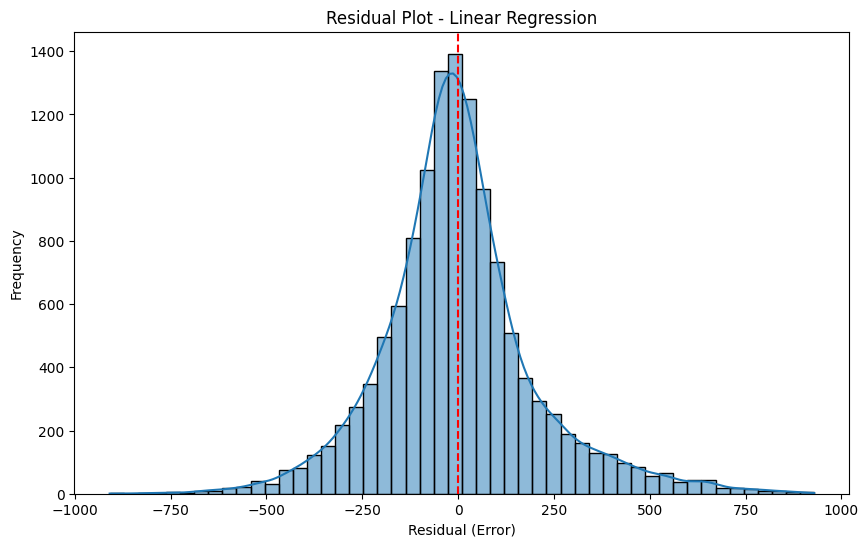


Decision Tree Results:
R²: 0.8126
MAE: 129.5855
MSE: 34695.3823
RMSE: 186.2670


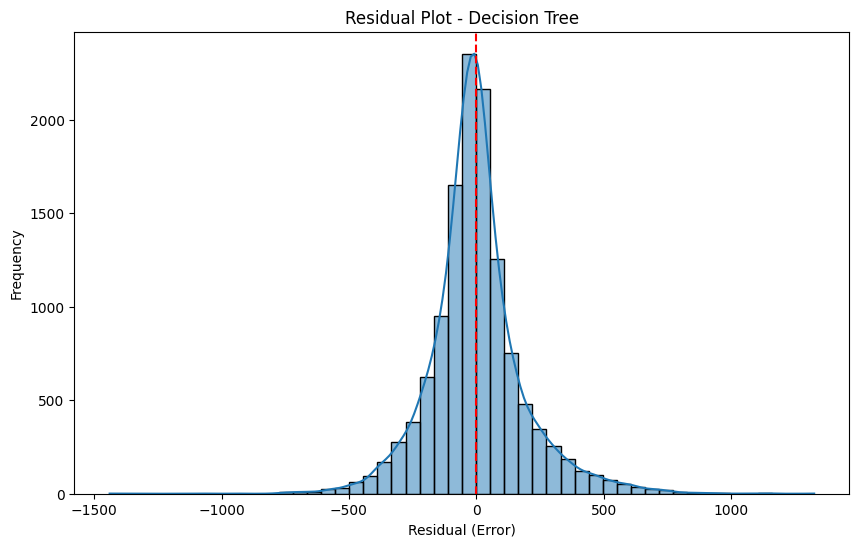


Gaussian Process Regressor Results:
R²: -1.9204
MAE: 161.6037
MSE: 540777.9218
RMSE: 735.3760


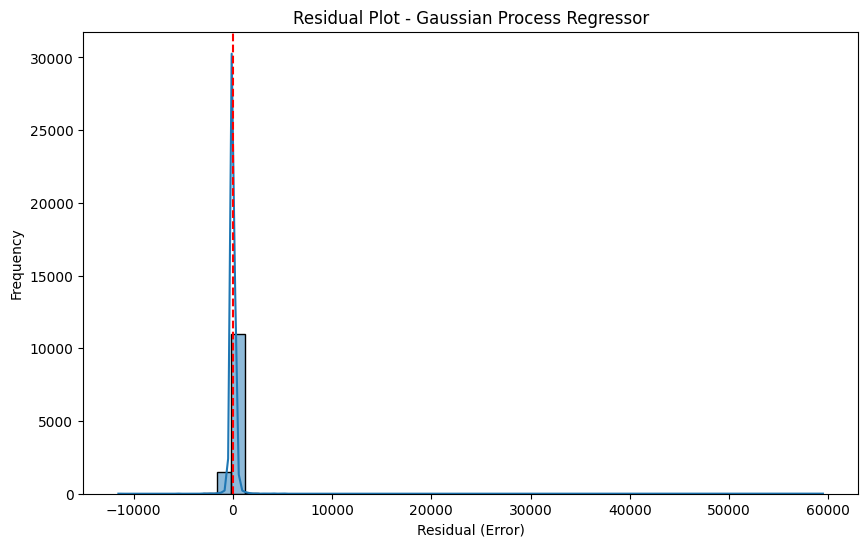


AdaBoost Results:
R²: 0.7663
MAE: 150.5604
MSE: 43274.0208
RMSE: 208.0241


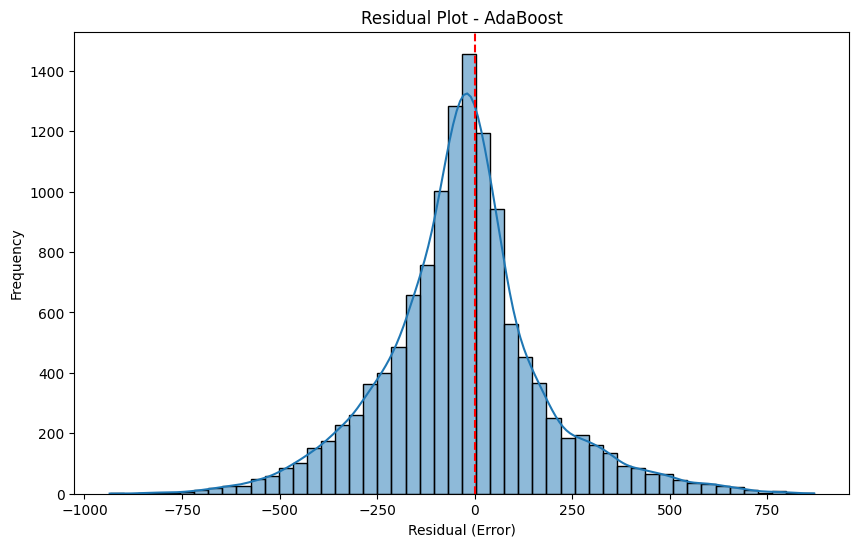


SVR Results:
R²: 0.7873
MAE: 136.5298
MSE: 39394.0323
RMSE: 198.4793


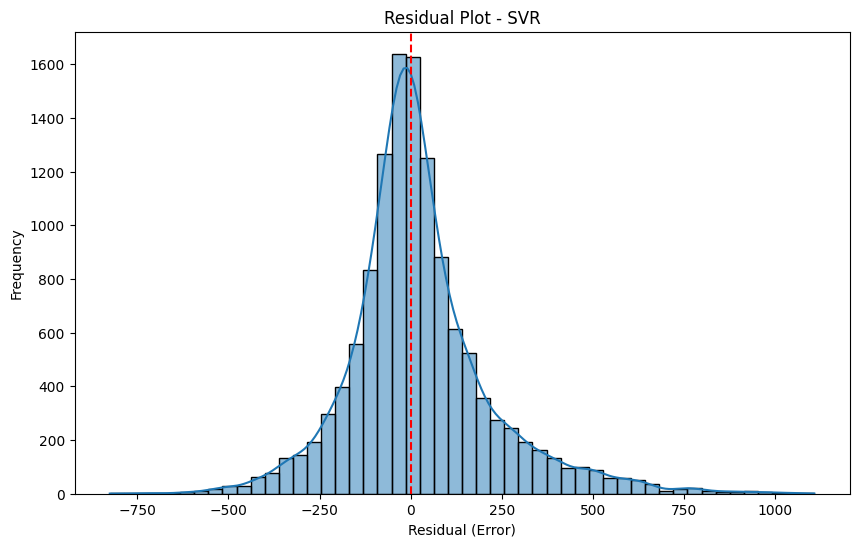


KNeighbors Results:
R²: 0.8159
MAE: 129.5231
MSE: 34096.6843
RMSE: 184.6529


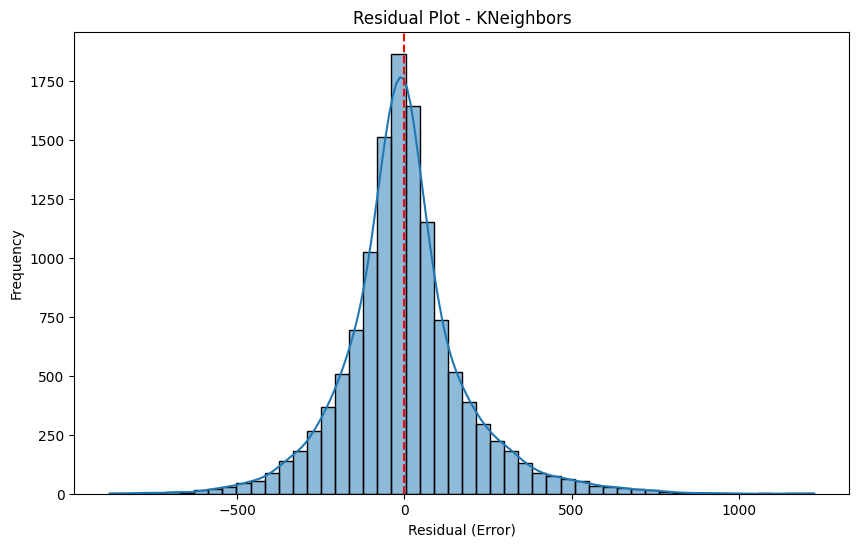


Benchmarking on Expedia data:
                                  R²         MAE            MSE        RMSE
Linear Regression           0.777982  144.777143   41111.860631  202.760599
Decision Tree               0.812633  129.585479   34695.382285  186.266965
Gaussian Process Regressor -1.920389  161.603698  540777.921795  735.376041
AdaBoost                    0.766305  150.560447   43274.020848  208.024087
SVR                         0.787258  136.529768   39394.032349  198.479300
KNeighbors                  0.815866  129.523067   34096.684282  184.652875


<ipython-input-196-395acd7f7ecc>:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x=results_df.index, y="R²", palette="Blues_r")


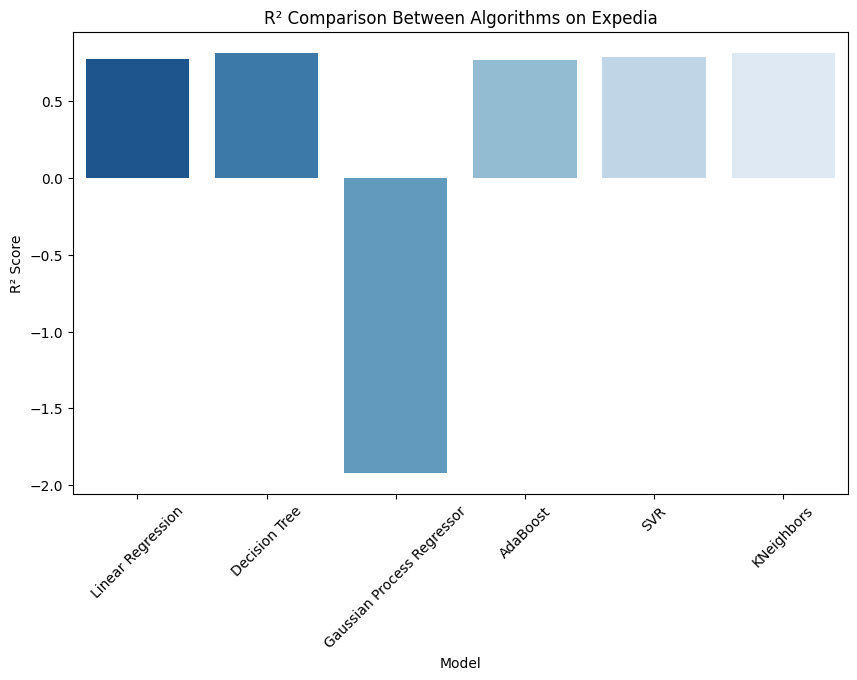

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Loading Expedia data
file_path = "/content/expidia_filtered_final.csv"
df_expedia = pd.read_csv(file_path)

# Selecting the features for the model
features = ["ttt", "los", "stars", "rating_score", "rating_numeric"]
target = "price"

X = df_expedia[features]
y = df_expedia[target]

# Split into Train/Test (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the data (required for most algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a dictionary for the results
results = {}

# Function to run the algorithm and calculate error metrics
def evaluate_model(model, model_name):
    model.fit(X_train_scaled, y_train)
    y_test_pred = model.predict(X_test_scaled)

    test_r2 = r2_score(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)

    results[model_name] = {
        "R²": test_r2,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse
    }

    print(f"\n{model_name} Results:")
    print(f"R²: {test_r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")

    # Residual Plot
    residuals = y_test - y_test_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, bins=50)
    plt.axvline(0, color="red", linestyle="--")
    plt.xlabel("Residual (Error)")
    plt.ylabel("Frequency")
    plt.title(f"Residual Plot - {model_name}")
    plt.show()

# Running the models
evaluate_model(LinearRegression(), "Linear Regression")
evaluate_model(DecisionTreeRegressor(max_depth=10, random_state=42), "Decision Tree")
evaluate_model(GaussianProcessRegressor(), "Gaussian Process Regressor")
evaluate_model(AdaBoostRegressor(n_estimators=100, random_state=42), "AdaBoost")
evaluate_model(SVR(kernel="rbf", C=10), "SVR")
evaluate_model(KNeighborsRegressor(n_neighbors=10), "KNeighbors")

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Print the final table
print("\nBenchmarking on Expedia data:")
print(results_df.to_string(index=True))

# Display a graph Performance Comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x=results_df.index, y="R²", palette="Blues_r")
plt.title("R² Comparison Between Algorithms on Expedia")
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.show()
